In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('../Files/Clean.csv')



In [5]:
df.columns

Index(['fid', 'fname', 'fruntime', 'fimdb_rating', 'fimdb_votes', 'fimd',
       'fdirector', 'fwriter', 'fassistant_directors', 'fcinematographers',
       'fcomposers', 'feditors', 'fproducer', 'fenglish', 'fmulti_lang', 'fus',
       'fmulti_country', 'fmystery', 'fadventure', 'ffamily', 'fromance',
       'fthriller', 'fwestern', 'fhistory', 'fmusical', 'fdrama', 'fwar',
       'ffantasy', 'fcrime', 'fanimation', 'fsport', 'faction', 'fbiography',
       'fcomedy', 'fsci-fi', 'fhorror', 'fmusic', 'actW', 'nominated', 'Won',
       'month', 'year', 'certificate_G', 'certificate_PG', 'certificate_PG-13',
       'certificate_R', 'certificate_Unrated', 'fproduction_BBC Films',
       'fproduction_Columbia Pictures', 'fproduction_Dimension Films',
       'fproduction_DreamWorks', 'fproduction_Fox Searchlight Pictures',
       'fproduction_Lionsgate', 'fproduction_Millennium Films',
       'fproduction_New Line Cinema', 'fproduction_Paramount Pictures',
       'fproduction_Screen Gems', 

In [6]:
df[['fname','fbudget_y','fGross_y','fcumlative_y']]

fname    fbudget_y     fGross_y  fcumlative_y
0             Kate & Leopold   48000000.0   47121859.0    76019048.0
1            The Fantasticks   10000000.0      49666.0       49666.0
2                    Glitter   22000000.0    4274407.0     5271666.0
3       In the Mood for Love  196915468.9    2738980.0    12854953.0
4        The Dancer Upstairs   35500708.0    2377348.0     5227348.0
...                      ...          ...          ...           ...
6687               Capernaum    4000000.0    1661096.0    64398132.0
6688            The Specials     564839.4  251686074.1    15496959.0
6689            Bala (Hindi)   19180546.1  277631005.5     1370210.0
6690                    Sita    1214841.3  322580564.2        6954.0
6691  The Pilgrim's Progress    6971362.4    1294596.0     3173282.0

[6692 rows x 4 columns]

In [7]:
df.shape

(6692, 65)

In [8]:
df.isnull().sum().sum()

0

In [9]:
# eda_data.drop_duplicates(keep='first', inplace=True)
# eda_data.reset_index(drop=True,inplace=True)

In [10]:
df.columns

Index(['fid', 'fname', 'fruntime', 'fimdb_rating', 'fimdb_votes', 'fimd',
       'fdirector', 'fwriter', 'fassistant_directors', 'fcinematographers',
       'fcomposers', 'feditors', 'fproducer', 'fenglish', 'fmulti_lang', 'fus',
       'fmulti_country', 'fmystery', 'fadventure', 'ffamily', 'fromance',
       'fthriller', 'fwestern', 'fhistory', 'fmusical', 'fdrama', 'fwar',
       'ffantasy', 'fcrime', 'fanimation', 'fsport', 'faction', 'fbiography',
       'fcomedy', 'fsci-fi', 'fhorror', 'fmusic', 'actW', 'nominated', 'Won',
       'month', 'year', 'certificate_G', 'certificate_PG', 'certificate_PG-13',
       'certificate_R', 'certificate_Unrated', 'fproduction_BBC Films',
       'fproduction_Columbia Pictures', 'fproduction_Dimension Films',
       'fproduction_DreamWorks', 'fproduction_Fox Searchlight Pictures',
       'fproduction_Lionsgate', 'fproduction_Millennium Films',
       'fproduction_New Line Cinema', 'fproduction_Paramount Pictures',
       'fproduction_Screen Gems', 

Tukeys method number of outliers is 311
90% confidence interval has 0 values between 106 and 107


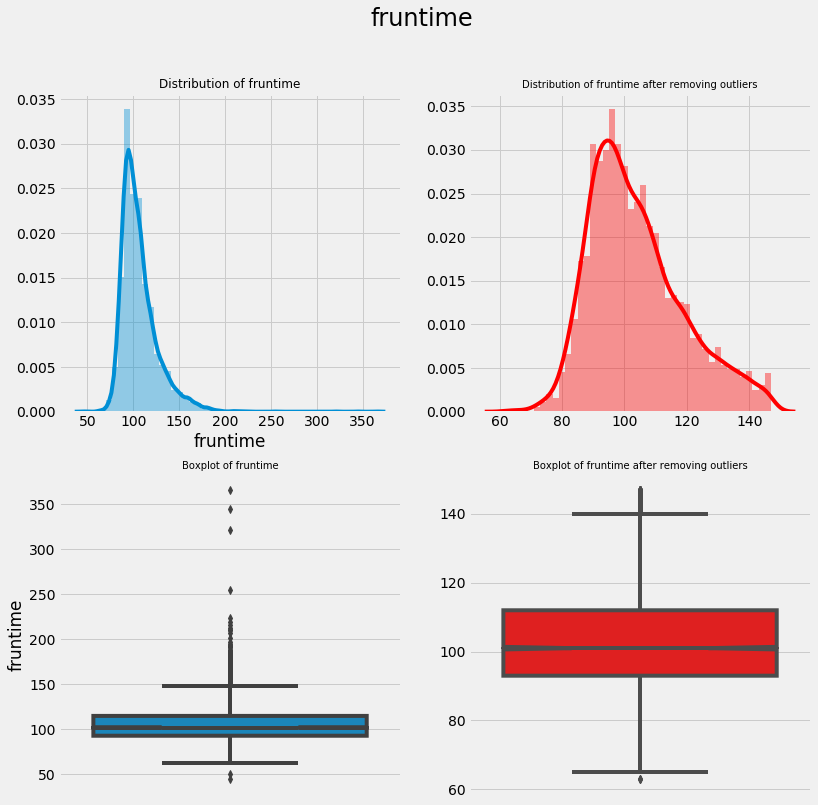

In [11]:
def no_outlier(Data_column,data_set):
    import math
    X = data_set[Data_column]
    no_outlier = []
    confidence = []
    
    q1 = float(X.describe()['25%'])
    q3 = float(X.describe()['75%'])
    iqr = (q3 - q1)*1.5
    std = float(X.describe()['std'])
    mean = float(X.describe()['mean'])
    lower_limit = mean-(1.645*(std/math.sqrt(len(X))))
    higher_limit = mean+(1.645*(std/math.sqrt(len(X))))
    
    for total in X:
        if lower_limit < total < higher_limit:
            confidence.append(total)
        
        if (q1 - iqr) < (total) < (q3 + iqr):
            no_outlier.append(total)
        else:
            pass
    print('Tukeys method number of outliers is {}'.format((len(X)-len(sorted(no_outlier)))))
    print('90% confidence interval has {} values between {} and {}'.format(len(sorted(confidence)),round(lower_limit),round(higher_limit)))
    
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
    sns.distplot(X, ax=ax[0,0])
    sns.distplot(no_outlier,color='red', ax=ax[0,1])
    sns.boxplot(X,notch=True,orient='v',ax=ax[1,0])
    sns.boxplot(no_outlier,notch=True,orient='v',color='red',ax=ax[1,1])
    
    fig.suptitle('{}'.format(Data_column), fontsize=24)
    ax[0,0].set_title('Distribution of {}'.format(Data_column), fontsize=12)
    ax[0,1].set_title('Distribution of {} after removing outliers'.format(Data_column), fontsize=10)
    ax[1,0].set_title('Boxplot of {}'.format(Data_column), fontsize=10)
    ax[1,1].set_title('Boxplot of {} after removing outliers'.format(Data_column), fontsize=10)
    
no_outlier('fruntime',df)

In [12]:
df.columns

Index(['fid', 'fname', 'fruntime', 'fimdb_rating', 'fimdb_votes', 'fimd',
       'fdirector', 'fwriter', 'fassistant_directors', 'fcinematographers',
       'fcomposers', 'feditors', 'fproducer', 'fenglish', 'fmulti_lang', 'fus',
       'fmulti_country', 'fmystery', 'fadventure', 'ffamily', 'fromance',
       'fthriller', 'fwestern', 'fhistory', 'fmusical', 'fdrama', 'fwar',
       'ffantasy', 'fcrime', 'fanimation', 'fsport', 'faction', 'fbiography',
       'fcomedy', 'fsci-fi', 'fhorror', 'fmusic', 'actW', 'nominated', 'Won',
       'month', 'year', 'certificate_G', 'certificate_PG', 'certificate_PG-13',
       'certificate_R', 'certificate_Unrated', 'fproduction_BBC Films',
       'fproduction_Columbia Pictures', 'fproduction_Dimension Films',
       'fproduction_DreamWorks', 'fproduction_Fox Searchlight Pictures',
       'fproduction_Lionsgate', 'fproduction_Millennium Films',
       'fproduction_New Line Cinema', 'fproduction_Paramount Pictures',
       'fproduction_Screen Gems', 

In [13]:
#This function will take the boolean columns into considration and creates a data frame with the required fields to visulize.
#The input is the dataframe and the columns that need to be extracted for measures ex(budget(mean),gross(mean)) for each genre

def dummy_finances(df,array):
    import collections
    
    mul_list_dict = collections.defaultdict(list)
    rating = []
    runtime = []
    imdb_votes = []
    
    for i in range(0,df.shape[0]):
        for j in array.columns:
            if df[j][i] != 0:
                a = str(df[j])
                mul_list_dict['{}_budget'.format(j)].append(df['fbudget_y'][i])
                mul_list_dict['{}_Gross'.format(j)].append(df['fGross_y'][i])
                mul_list_dict['{}_cumlative'.format(j)].append(df['fcumlative_y'][i])
                mul_list_dict['{}_fimdb_rating'.format(j)].append(df['fimdb_rating'][i])
                mul_list_dict['{}_runtime'.format(j)].append(df['fruntime'][i])
                mul_list_dict['{}_imdb_votes'.format(j)].append(df['fimdb_votes'][i])
                mul_list_dict['{}_won'.format(j)].append(df['Won'][i])
                mul_list_dict['{}_nominated'.format(j)].append(df['nominated'][i])
                
                
    genre_title = []
    genre_budget = []
    genre_Gross = []
    genre_cumilative = []
    frating = []
    fruntime = []
    fvotes = []
    Won = []
    nominated = []
    
    for i in array:
        genre_title.append(i)
        genre_budget.append(int((sum(mul_list_dict['{}_budget'.format(i)]))/(len(mul_list_dict['{}_budget'.format(i)]))))
        genre_Gross.append(int((sum(mul_list_dict['{}_Gross'.format(i)]))/(len(mul_list_dict['{}_Gross'.format(i)]))))
        genre_cumilative.append(int((sum(mul_list_dict['{}_cumlative'.format(i)]))/(len(mul_list_dict['{}_cumlative'.format(i)]))))
        frating.append(int((sum(mul_list_dict['{}_fimdb_rating'.format(i)]))/(len(mul_list_dict['{}_fimdb_rating'.format(i)]))))
        fruntime.append(int((sum(mul_list_dict['{}_runtime'.format(i)]))/(len(mul_list_dict['{}_runtime'.format(i)]))))
        fvotes.append(int((sum(mul_list_dict['{}_imdb_votes'.format(i)]))/(len(mul_list_dict['{}_imdb_votes'.format(i)]))))
        Won.append(float((sum(mul_list_dict['{}_won'.format(i)]))/(len(mul_list_dict['{}_cumlative'.format(i)]))*100))
        nominated.append(float((sum(mul_list_dict['{}_nominated'.format(i)]))/(len(mul_list_dict['{}_cumlative'.format(i)]))*100))
       
        
    
    
    return pd.DataFrame({'title':genre_title,'budget_avg':genre_budget,'Gross_avg':genre_Gross,'cumilative_avg':genre_cumilative,\
                        'fimdb_rating':frating,'runtime':fruntime,'votes':fvotes,'won_per':Won,'nominated':nominated})

    

### Genre

In [14]:
df.columns

Index(['fid', 'fname', 'fruntime', 'fimdb_rating', 'fimdb_votes', 'fimd',
       'fdirector', 'fwriter', 'fassistant_directors', 'fcinematographers',
       'fcomposers', 'feditors', 'fproducer', 'fenglish', 'fmulti_lang', 'fus',
       'fmulti_country', 'fmystery', 'fadventure', 'ffamily', 'fromance',
       'fthriller', 'fwestern', 'fhistory', 'fmusical', 'fdrama', 'fwar',
       'ffantasy', 'fcrime', 'fanimation', 'fsport', 'faction', 'fbiography',
       'fcomedy', 'fsci-fi', 'fhorror', 'fmusic', 'actW', 'nominated', 'Won',
       'month', 'year', 'certificate_G', 'certificate_PG', 'certificate_PG-13',
       'certificate_R', 'certificate_Unrated', 'fproduction_BBC Films',
       'fproduction_Columbia Pictures', 'fproduction_Dimension Films',
       'fproduction_DreamWorks', 'fproduction_Fox Searchlight Pictures',
       'fproduction_Lionsgate', 'fproduction_Millennium Films',
       'fproduction_New Line Cinema', 'fproduction_Paramount Pictures',
       'fproduction_Screen Gems', 

In [15]:
#Rename the columns to the desired name
df.rename(columns = {'fsci-fi':'fsci_fi','freality-tv':'freality_tv','fgame-show':'fgame_show','ftalk-show':'ftalk_show'},inplace = True)

In [16]:
# Choose only the columns that are needed
genre = df[['fcomedy', 'fmystery','fadventure', 'fbiography', 'fthriller', 'ffamily',
    'fhistory', 'fcrime', 'fhorror',  'fwar', 'fwestern', 'faction', 'fmusical', 'fsport', 'fmusic',
    'fanimation', 'fromance', 'fsci_fi', 'ffantasy', 'fdrama']]

In [17]:
#Apply the function
genre_discription = dummy_finances(df,genre)

In [18]:
#Boolean columns became in one column with the reqired measures
genre_discription

title  budget_avg  Gross_avg  cumilative_avg  fimdb_rating  runtime  \
0      fcomedy    34324744   86529224        52592737             6      102   
1     fmystery    31227798   95895130        50522210             6      104   
2   fadventure    72360868  111971316       207647405             6      107   
3   fbiography    28581372   55739166        36241829             6      115   
4    fthriller    32461475  102553937        48746633             6      106   
5      ffamily    63155202  111744560       175852519             6       98   
6     fhistory    31968607   60358295        41806201             6      121   
7       fcrime    28387607   85471432        34916823             6      107   
8      fhorror    23365024  113827339        29272186             5       97   
9         fwar    35383613   72665634        45457040             6      118   
10    fwestern    36324771   77741274        48459968             6      112   
11     faction    51779156  119710852       114985720             6      113   
12    fmusical    39356602   92705881        97949449             6      120   
13      fsport    39263972   51862270        43865839             6      111   
14      fmusic    25883139   61251511        39129557             6      109   
15  fanimation    69027339  129522979       215656936             6       92   
16    fromance    29206542   73266581        33736839             6      109   
17     fsci_fi    61491557  118996656       149916386             6      105   
18    ffantasy    61899251  110974238       165297035             6      104   
19      fdrama    27084882   81248855        28364322             6      109   

     votes   won_per  nominated  
0    47042  1.282051  10.216346  
1    70637  2.781457  20.000000  
2   140074  5.153374  40.245399  
3    63988  7.877462  72.647702  
4    69969  1.925926  16.444444  
5    78217  5.020080  25.502008  
6    57083  7.368421  74.035088  
7    60859  1.473137  14.904679  
8    40702  0.338600   1.354402  
9    62351  6.428571  55.714286  
10   76918  5.333333  56.000000  
11  107184  1.508296  16.214178  
12   49126  4.516129  30.322581  
13   48023  1.020408  25.510204  
14   35635  4.417671  26.506024  
15   95599  6.538462  31.538462  
16   40317  2.280912  18.607443  
17  143249  2.131439  21.492007  
18  106892  4.595880  36.925515  
19   46487  3.025169  28.073572

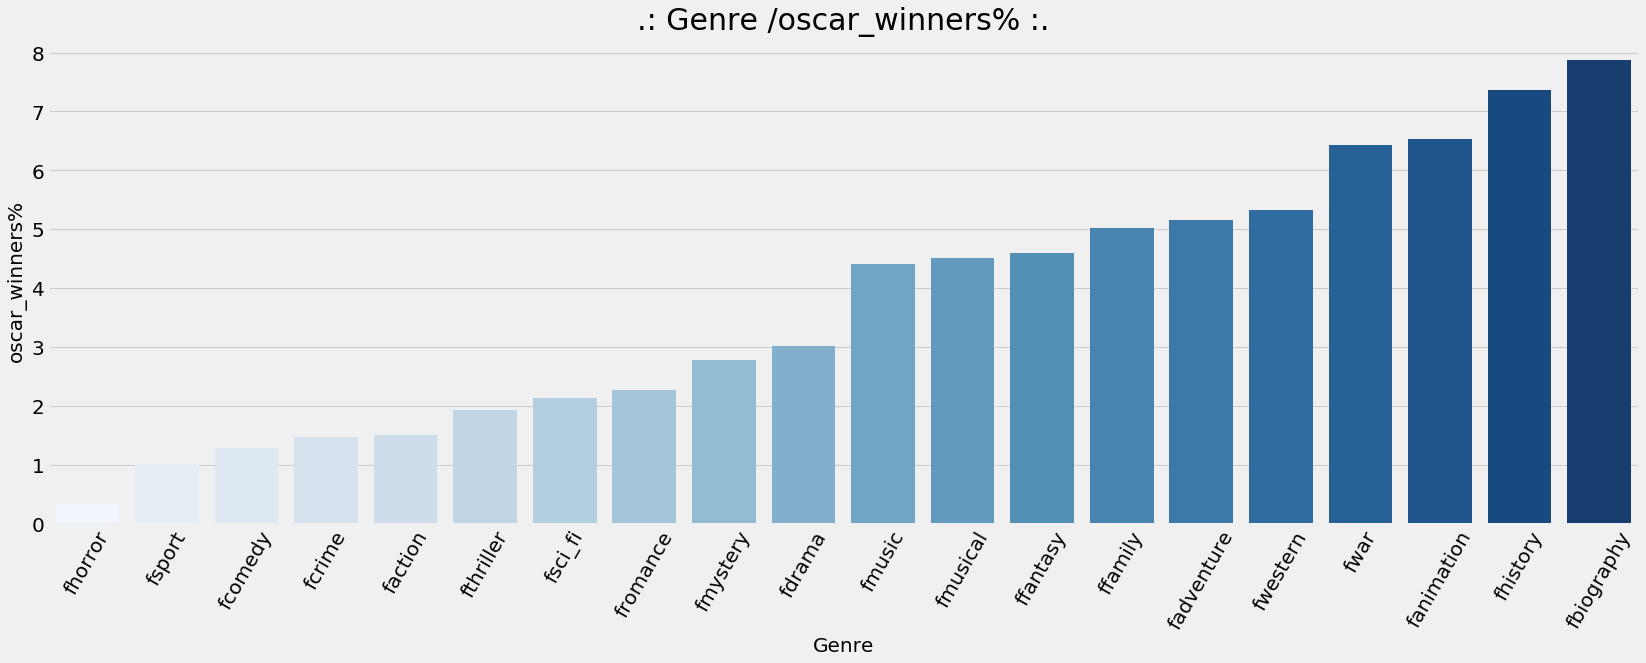

In [19]:
#Plot the oscar winners
f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'title', y = 'won_per', data=genre_discription.sort_values(by=['won_per']),palette='Blues')
ax.set_title('.: Genre /oscar_winners% :.',size=30)
ax.set_xlabel('Genre',size=20)
plt.xticks(rotation=60)                                                               
plt.tight_layout()
plt.xticks(size=20)
plt.yticks(size=20)
ax.set_ylabel('oscar_winners%',size=20)
plt.show()

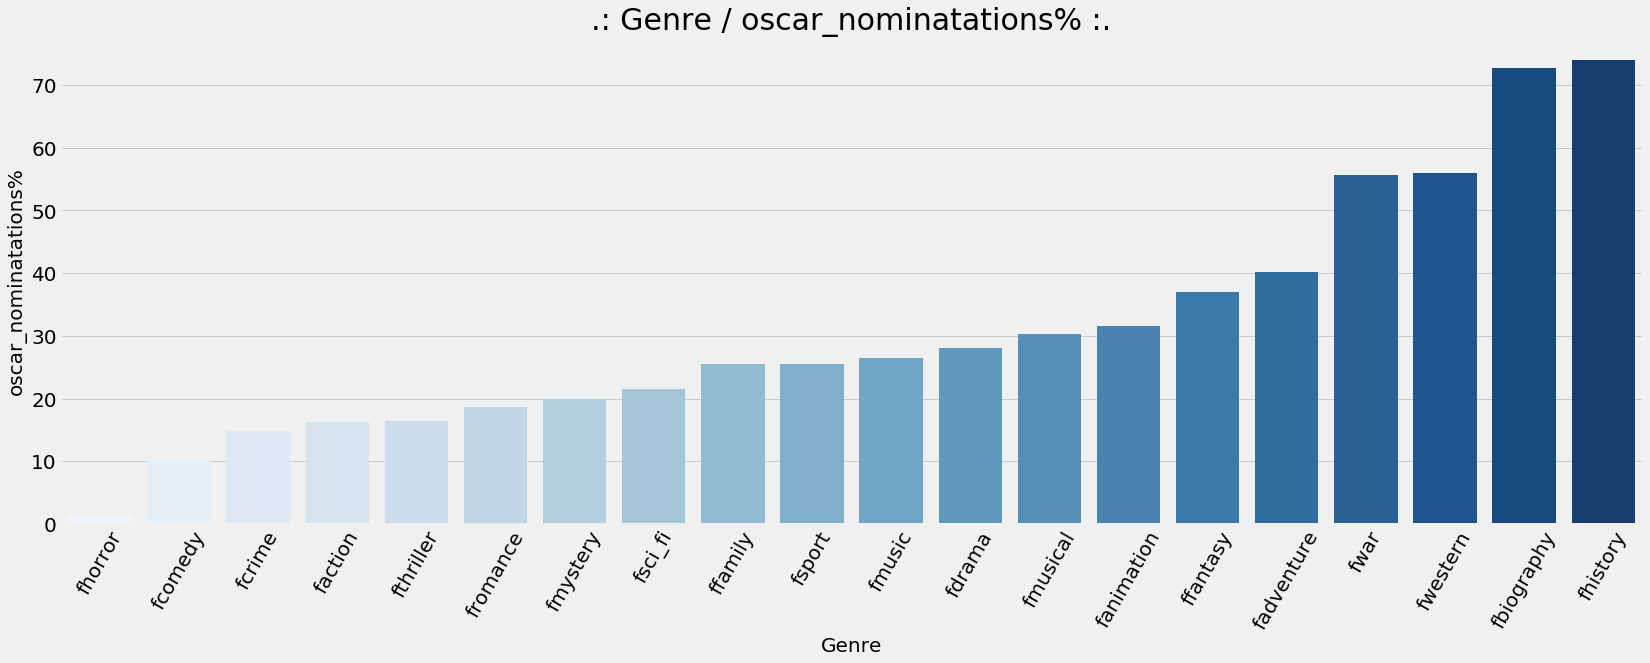

In [20]:
#Plot the oscar nominations
f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'title', y = 'nominated', data=genre_discription.sort_values(by=['nominated']),palette='Blues')
ax.set_title('.: Genre / oscar_nominatations% :.',size=30)
ax.set_xlabel('Genre',size=20)
plt.xticks(rotation=60)                                                               
plt.tight_layout()
plt.xticks(size=20)
plt.yticks(size=20)
ax.set_ylabel('oscar_nominatations%',size=20)
plt.show()

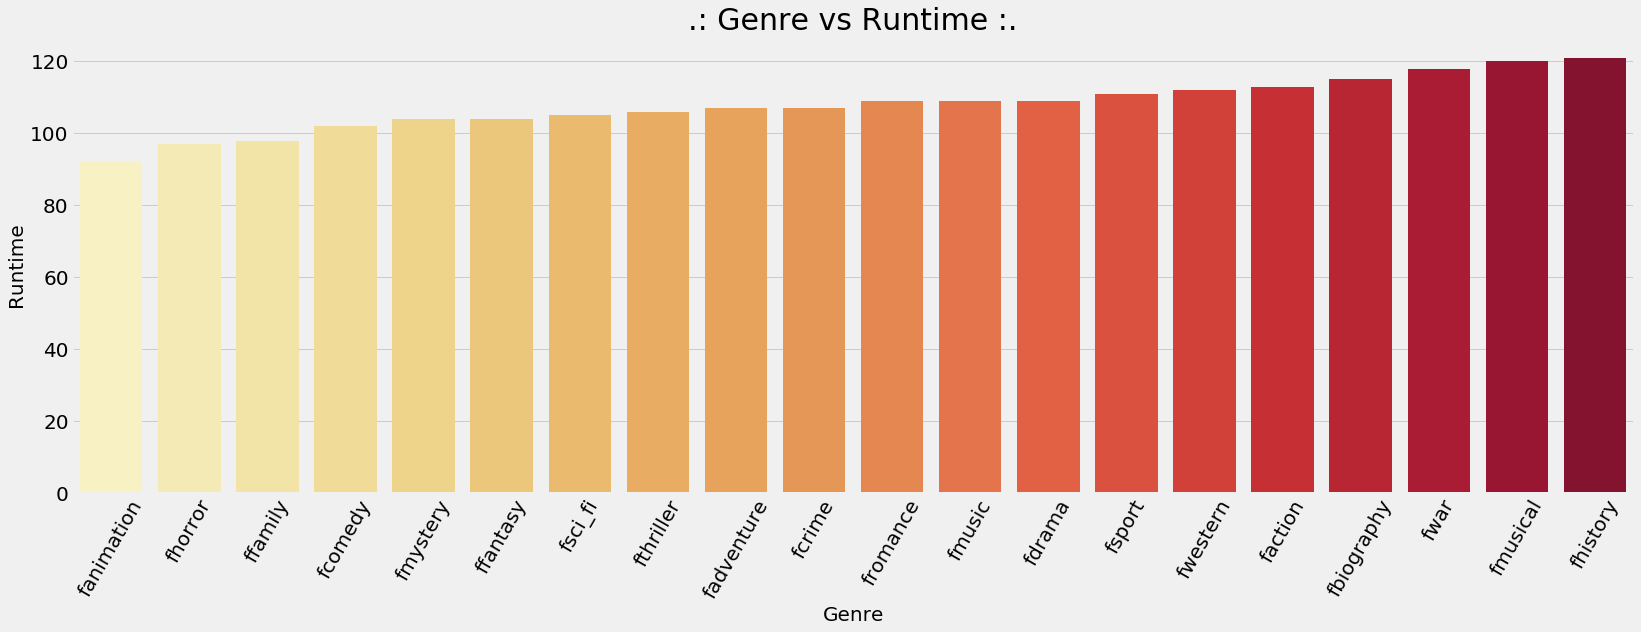

In [21]:
#Plot Genre vs runtime
f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'title', y = 'runtime',palette='YlOrRd', data=genre_discription.sort_values(by=['runtime']))
ax.set_title('.: Genre vs Runtime :.',size=30)
ax.set_xlabel('Genre',size=20)
plt.xticks(rotation=60) 
plt.xticks(size=20)
plt.yticks(size=20)
plt.tight_layout()
ax.set_ylabel('Runtime',size=20)
plt.show()

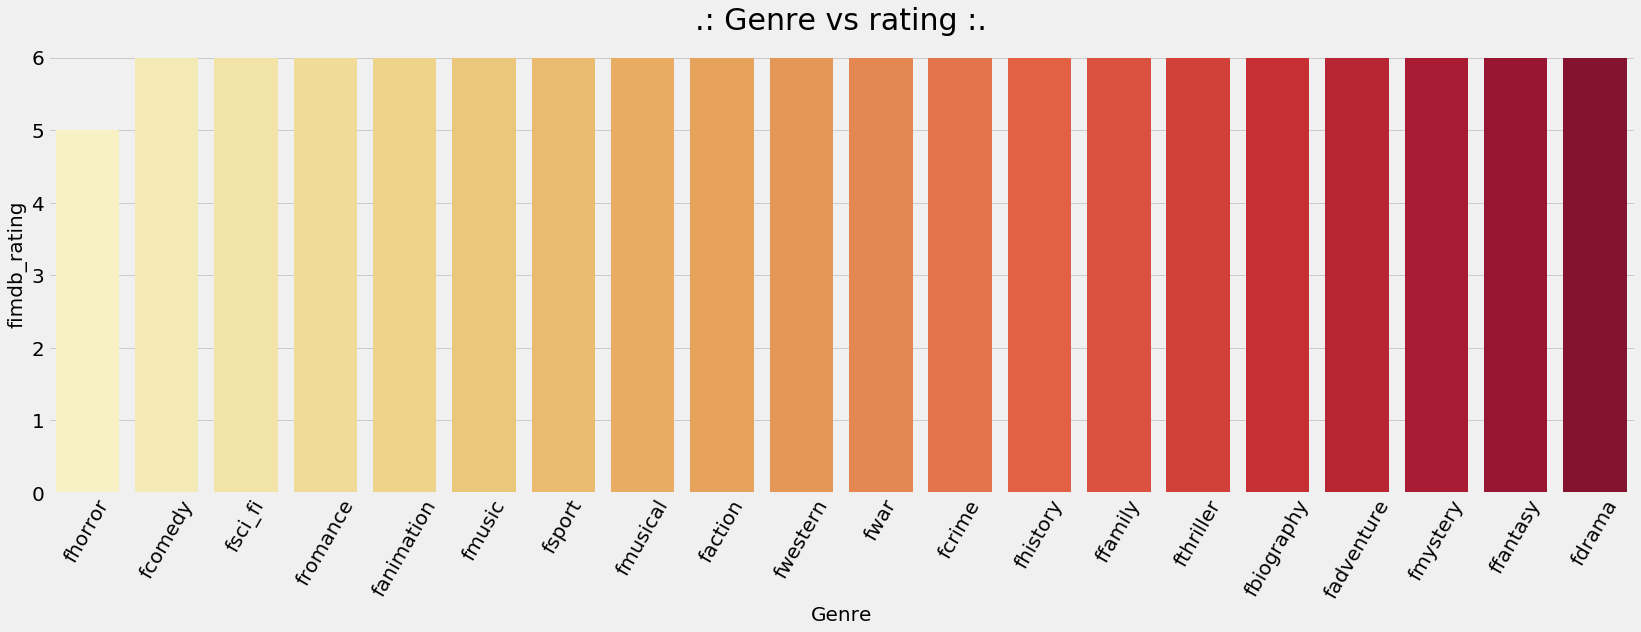

In [22]:
#Plot genre vs rating
f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'title', y = 'fimdb_rating',palette='YlOrRd', data=genre_discription.sort_values(by=['fimdb_rating']))
ax.set_title('.: Genre vs rating :.',size=30)
ax.set_xlabel('Genre',size=20)
plt.xticks(rotation=60) 
plt.xticks(size=20)
plt.yticks(size=20)
plt.tight_layout()
ax.set_ylabel('fimdb_rating',size=20)
plt.show()

In [23]:
#Set the index to the title of genre to further graph 
genre_discription.set_index(['title'],inplace=True)
genre_discription.head()

budget_avg  Gross_avg  cumilative_avg  fimdb_rating  runtime  \
title                                                                      
fcomedy       34324744   86529224        52592737             6      102   
fmystery      31227798   95895130        50522210             6      104   
fadventure    72360868  111971316       207647405             6      107   
fbiography    28581372   55739166        36241829             6      115   
fthriller     32461475  102553937        48746633             6      106   

             votes   won_per  nominated  
title                                    
fcomedy      47042  1.282051  10.216346  
fmystery     70637  2.781457  20.000000  
fadventure  140074  5.153374  40.245399  
fbiography   63988  7.877462  72.647702  
fthriller    69969  1.925926  16.444444

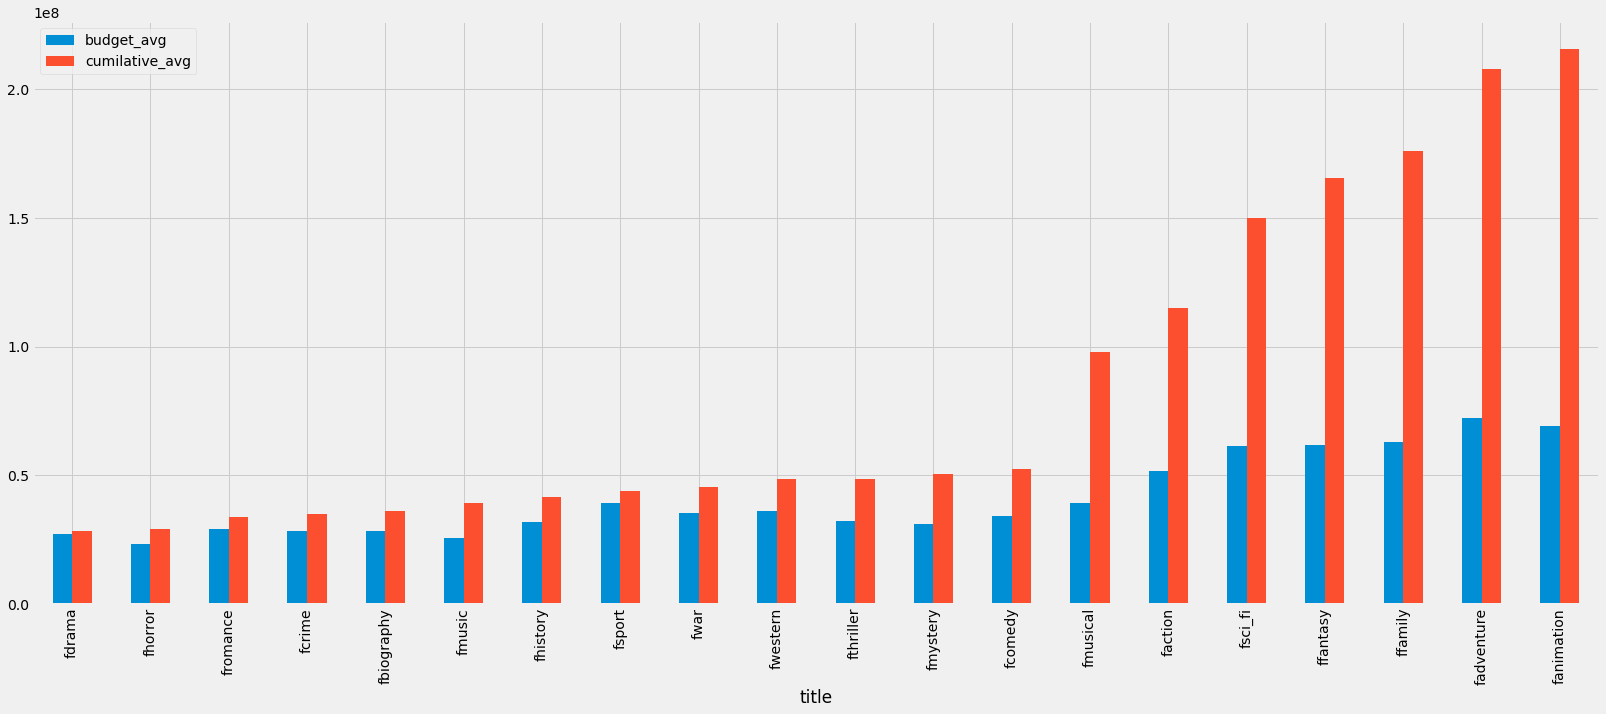

In [24]:
#Plot the budget and cumative for each genre
import matplotlib
genre_discription[['budget_avg','cumilative_avg']].sort_values(by=['cumilative_avg']).plot(kind='bar',figsize=(25,10))
matplotlib.rc('xtick', labelsize=30)     
matplotlib.rc('ytick', labelsize=30)


## Production

In [25]:
df.columns

Index(['fid', 'fname', 'fruntime', 'fimdb_rating', 'fimdb_votes', 'fimd',
       'fdirector', 'fwriter', 'fassistant_directors', 'fcinematographers',
       'fcomposers', 'feditors', 'fproducer', 'fenglish', 'fmulti_lang', 'fus',
       'fmulti_country', 'fmystery', 'fadventure', 'ffamily', 'fromance',
       'fthriller', 'fwestern', 'fhistory', 'fmusical', 'fdrama', 'fwar',
       'ffantasy', 'fcrime', 'fanimation', 'fsport', 'faction', 'fbiography',
       'fcomedy', 'fsci_fi', 'fhorror', 'fmusic', 'actW', 'nominated', 'Won',
       'month', 'year', 'certificate_G', 'certificate_PG', 'certificate_PG-13',
       'certificate_R', 'certificate_Unrated', 'fproduction_BBC Films',
       'fproduction_Columbia Pictures', 'fproduction_Dimension Films',
       'fproduction_DreamWorks', 'fproduction_Fox Searchlight Pictures',
       'fproduction_Lionsgate', 'fproduction_Millennium Films',
       'fproduction_New Line Cinema', 'fproduction_Paramount Pictures',
       'fproduction_Screen Gems', 

In [26]:
#Choose the boolean columns that need to be evaluated
production = df[['fproduction_BBC Films', 'fproduction_Columbia Pictures',
        'fproduction_Dimension Films', 'fproduction_DreamWorks',
        'fproduction_Fox Searchlight Pictures', 'fproduction_Lionsgate',
        'fproduction_Millennium Films', 'fproduction_New Line Cinema',
        'fproduction_Paramount Pictures', 'fproduction_Screen Gems',
        'fproduction_Summit Entertainment', 'fproduction_Twentieth Century Fox',
        'fproduction_Universal Pictures', 'fproduction_Walt Disney Pictures',
        'fproduction_other']]

In [27]:
#Apply the function for calculations
production_describtion = dummy_finances(df,production)

In [28]:
production_describtion.head()

title  budget_avg  Gross_avg  \
0                 fproduction_BBC Films    27288527  103467933   
1         fproduction_Columbia Pictures    66007859   81970141   
2           fproduction_Dimension Films    49223444   57994479   
3                fproduction_DreamWorks    47352830   55502276   
4  fproduction_Fox Searchlight Pictures    34572225   23376606   

   cumilative_avg  fimdb_rating  runtime   votes    won_per   nominated  
0         8490596             6      102   20110   0.000000    8.695652  
1       181889889             6      110  160946   3.472222   39.583333  
2        57275395             5       97   94885   2.702703    2.702703  
3       112792004             6      114  137295   9.433962  109.433962  
4        46154517             6      104  102898  17.021277  104.255319

In [29]:
#Strip the f_production for better visulization
production_describtion['title'] = production_describtion['title'].apply(lambda x : x.strip('fproduction_'))

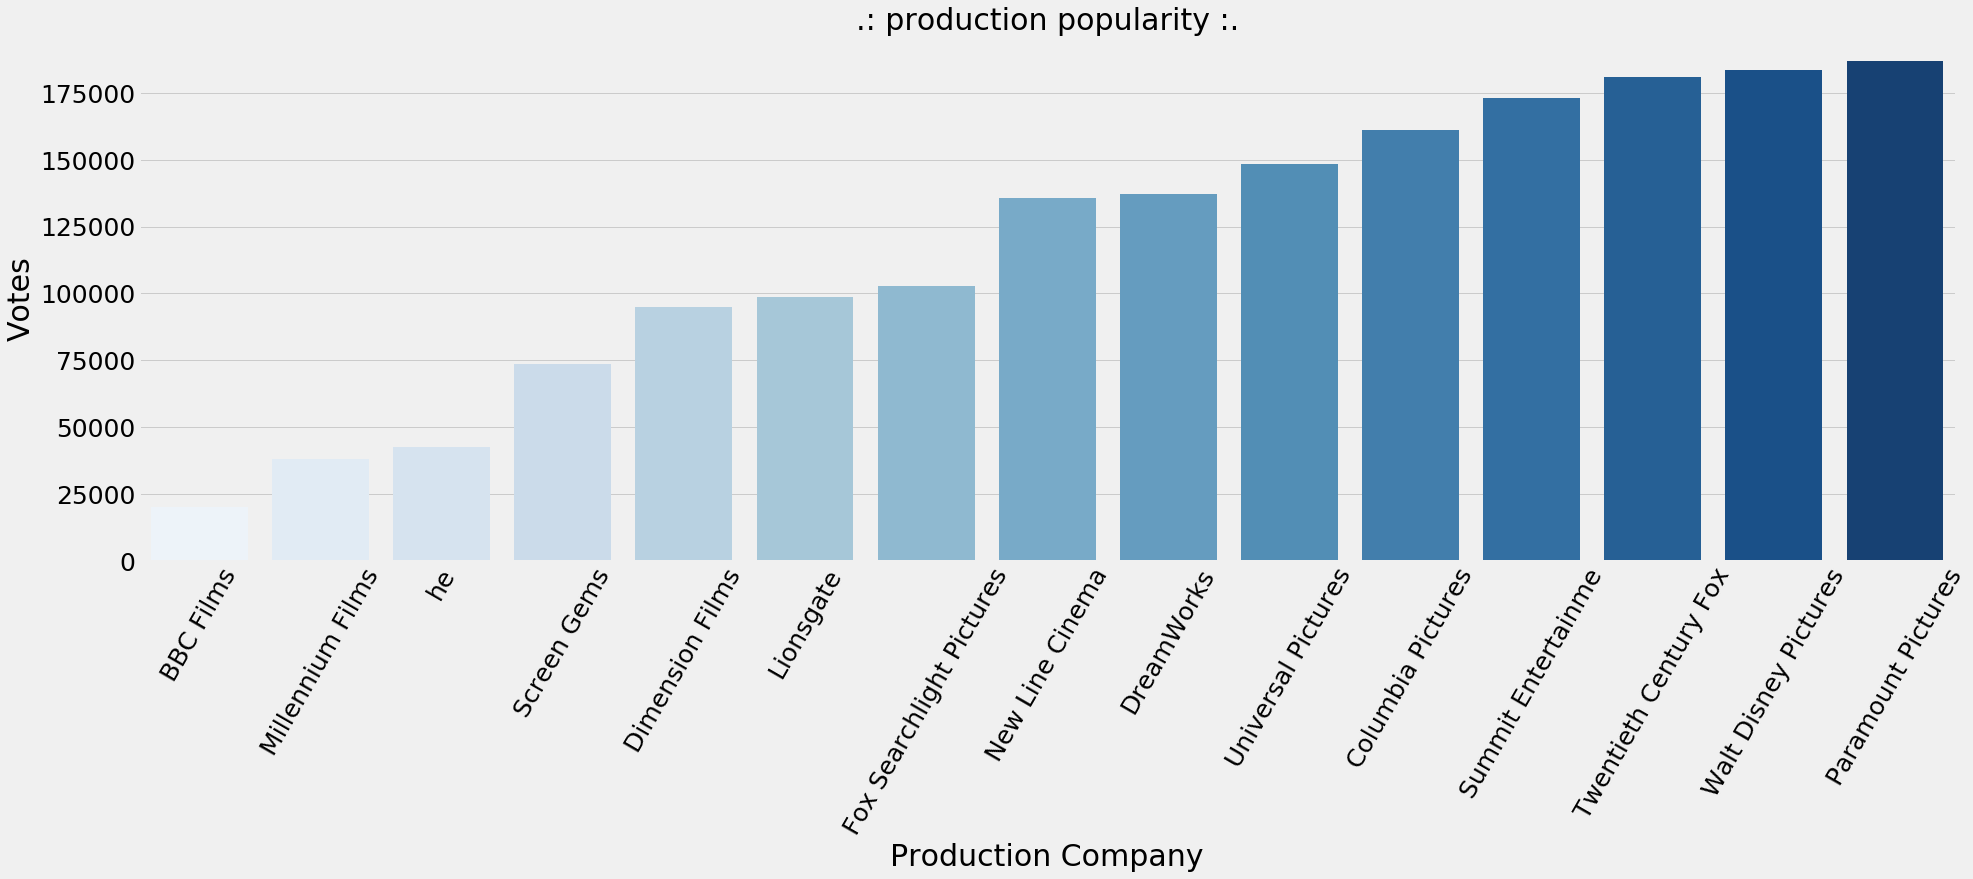

In [30]:
#Plot the production company populartiry by getting the votes vs production company
f, ax = plt.subplots(figsize=(29, 9))
sns.barplot(x = 'title', y = 'votes', data=production_describtion.sort_values(by=['votes']),palette='Blues')
ax.set_title('.: production popularity :.',size=30)
ax.set_xlabel('Production Company',size=30)
ax.set_ylabel('Votes',size=30)
plt.xticks(size=25)
plt.yticks(size=25)
plt.xticks(rotation=60) 
plt.show()

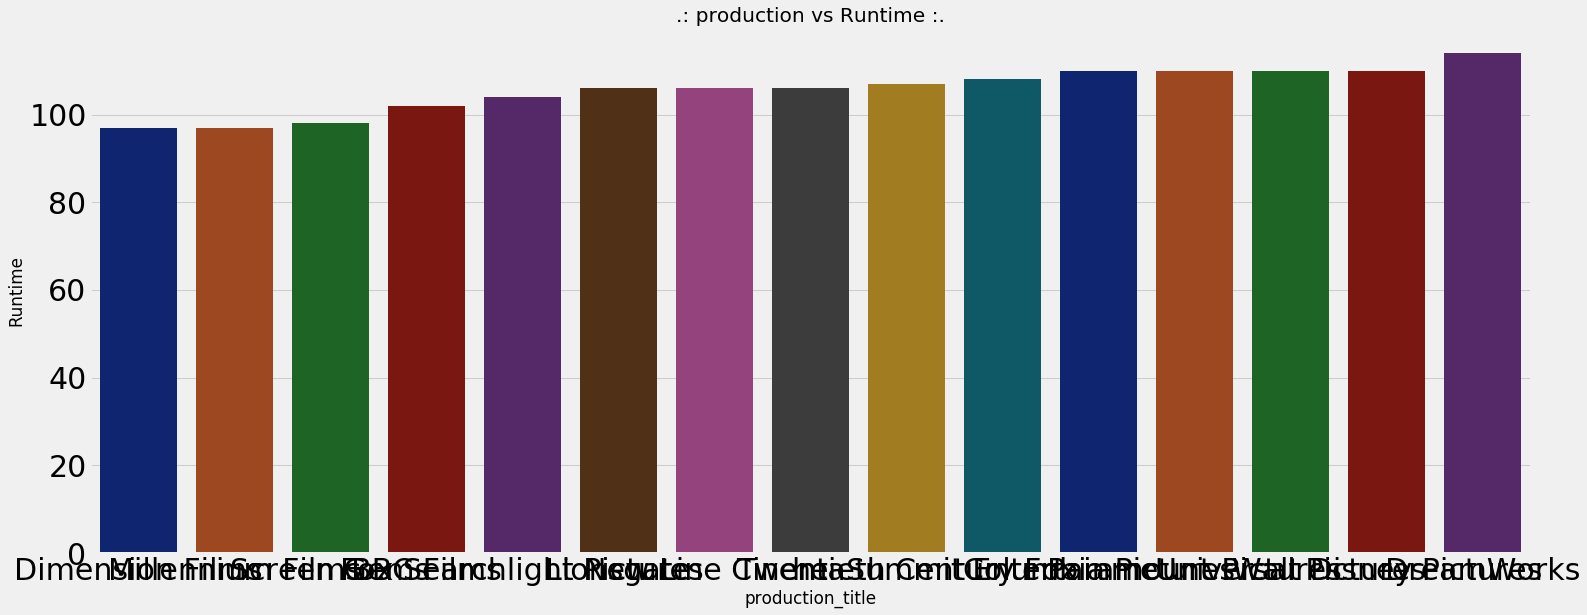

In [31]:
f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'title', y = 'runtime',palette='dark', data=production_describtion.sort_values(by=['runtime']))
ax.set_title('.: production vs Runtime :.')
ax.set_xlabel('production_title')
ax.set_ylabel('Runtime')
plt.show()

In [32]:
#Set the title of as index for better plotting
production_describtion.set_index(['title'],inplace=True)
production_describtion.head()

budget_avg  Gross_avg  cumilative_avg  fimdb_rating  \
title                                                                           
BBC Films                   27288527  103467933         8490596             6   
Columbia Pictures           66007859   81970141       181889889             6   
Dimension Films             49223444   57994479        57275395             5   
DreamWorks                  47352830   55502276       112792004             6   
Fox Searchlight Pictures    34572225   23376606        46154517             6   

                          runtime   votes    won_per   nominated  
title                                                             
BBC Films                     102   20110   0.000000    8.695652  
Columbia Pictures             110  160946   3.472222   39.583333  
Dimension Films                97   94885   2.702703    2.702703  
DreamWorks                    114  137295   9.433962  109.433962  
Fox Searchlight Pictures      104  102898  17.021277  104.255319

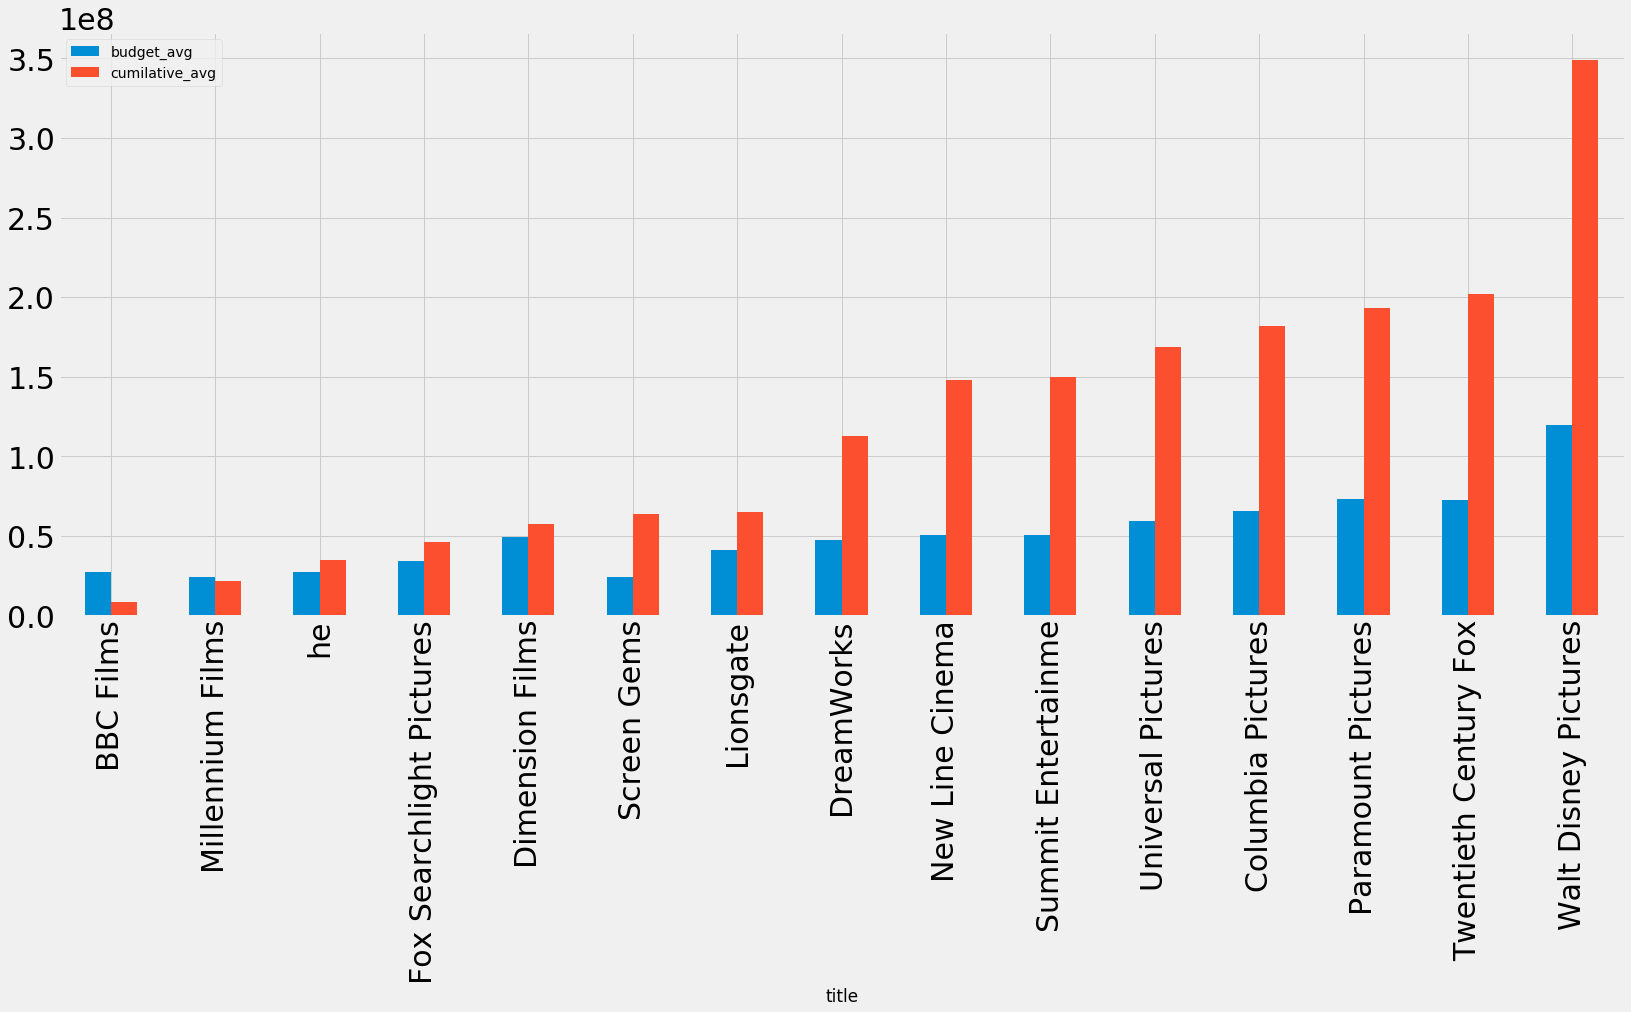

In [33]:
#Plotting the budget and cumilative for all production companies
production_describtion[['budget_avg','cumilative_avg']].sort_values(by=['cumilative_avg']).plot(kind='bar',figsize=(25,10))
matplotlib.rc('xtick', labelsize=15)     
matplotlib.rc('ytick', labelsize=15)

## certificates

In [34]:
#Choose the required boolean column
certeficate = df[['certificate_G', 'certificate_PG','certificate_PG-13', 'certificate_R', 'certificate_Unrated']]

In [35]:
#Apply the function
certeficate_describtion = dummy_finances(df,certeficate)

In [36]:
certeficate_describtion.head()

title  budget_avg  Gross_avg  cumilative_avg  fimdb_rating  \
0        certificate_G    52699333  120997168       148847133             6   
1       certificate_PG    53338167   89344573       140867662             6   
2    certificate_PG-13    48485769   82926245       106904131             6   
3        certificate_R    23201254   87959449        25072449             6   
4  certificate_Unrated    24847628  140634108         6793524             6   

   runtime  votes   won_per  nominated  
0       90  83517  5.063291  29.113924  
1      100  64449  3.690037  22.693727  
2      107  99748  3.304774  31.884945  
3      104  49698  2.345107  20.382166  
4      115  13536  0.000000   1.220753

In [37]:
#Strip text for better plotting 
certeficate_describtion['title'] = certeficate_describtion['title'].apply(lambda x : x.strip('certificate_'))

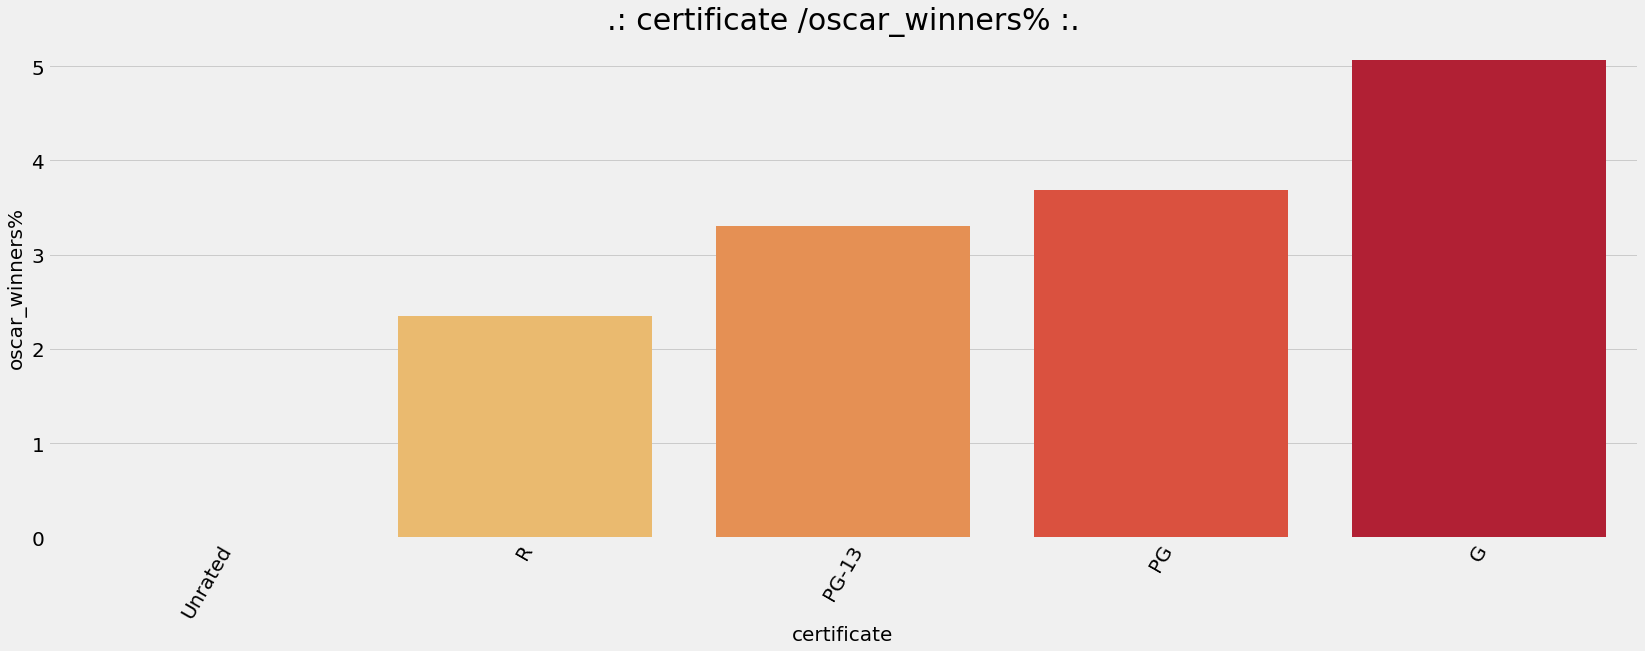

In [38]:
#Plot the oscar winners per certificate
f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'title', y = 'won_per', data=certeficate_describtion.sort_values(by=['won_per']),palette='YlOrRd')
ax.set_title('.: certificate /oscar_winners% :.',size=30)
ax.set_xlabel('certificate',size=20)
plt.xticks(rotation=60)                                                               
plt.tight_layout()
plt.xticks(size=20)
plt.yticks(size=20)
ax.set_ylabel('oscar_winners%',size=20)
plt.show()

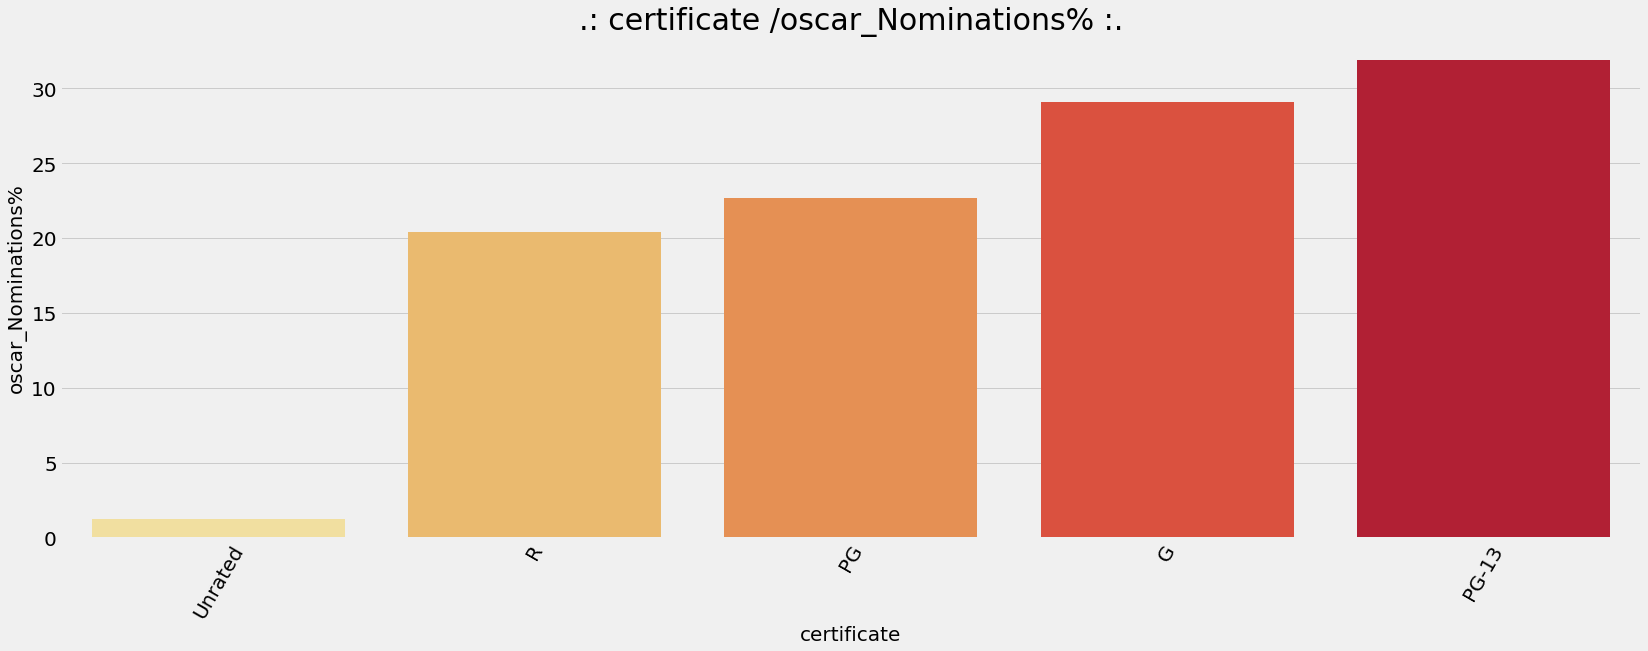

In [39]:
#Plot the cerificate nominations
f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'title', y = 'nominated', data=certeficate_describtion.sort_values(by=['nominated']),palette='YlOrRd')
ax.set_title('.: certificate /oscar_Nominations% :.',size=30)
ax.set_xlabel('certificate',size=20)
plt.xticks(rotation=60)                                                               
plt.tight_layout()
plt.xticks(size=20)
plt.yticks(size=20)
ax.set_ylabel('oscar_Nominations%',size=20)
plt.show()

In [40]:
#Strip the text for better visulizations
certeficate_describtion['title'] = certeficate_describtion['title'].apply(lambda x : x.strip('certificate_'))

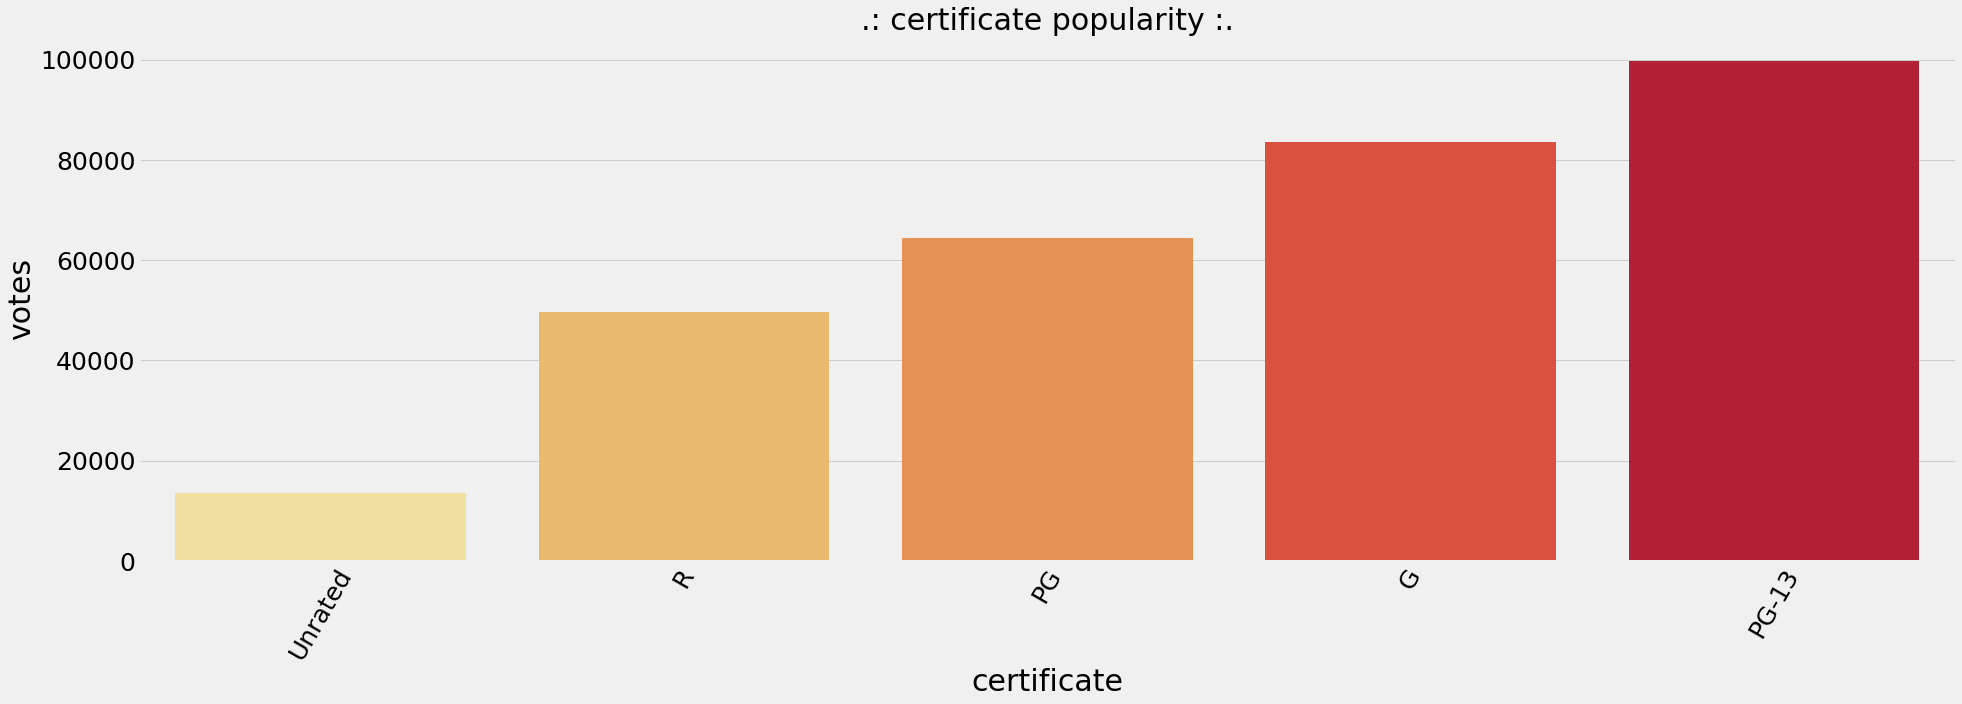

In [41]:
#Plot the certificate popluarity
f, ax = plt.subplots(figsize=(29, 9))
sns.barplot(x = 'title', y = 'votes', data=certeficate_describtion.sort_values(by=['votes']),palette='YlOrRd')
ax.set_title('.: certificate popularity :.',size=30)
ax.set_xlabel('certificate',size=30)
ax.set_ylabel('votes',size=30)
plt.xticks(size=25)
plt.yticks(size=25)
plt.xticks(rotation=60) 
plt.show()

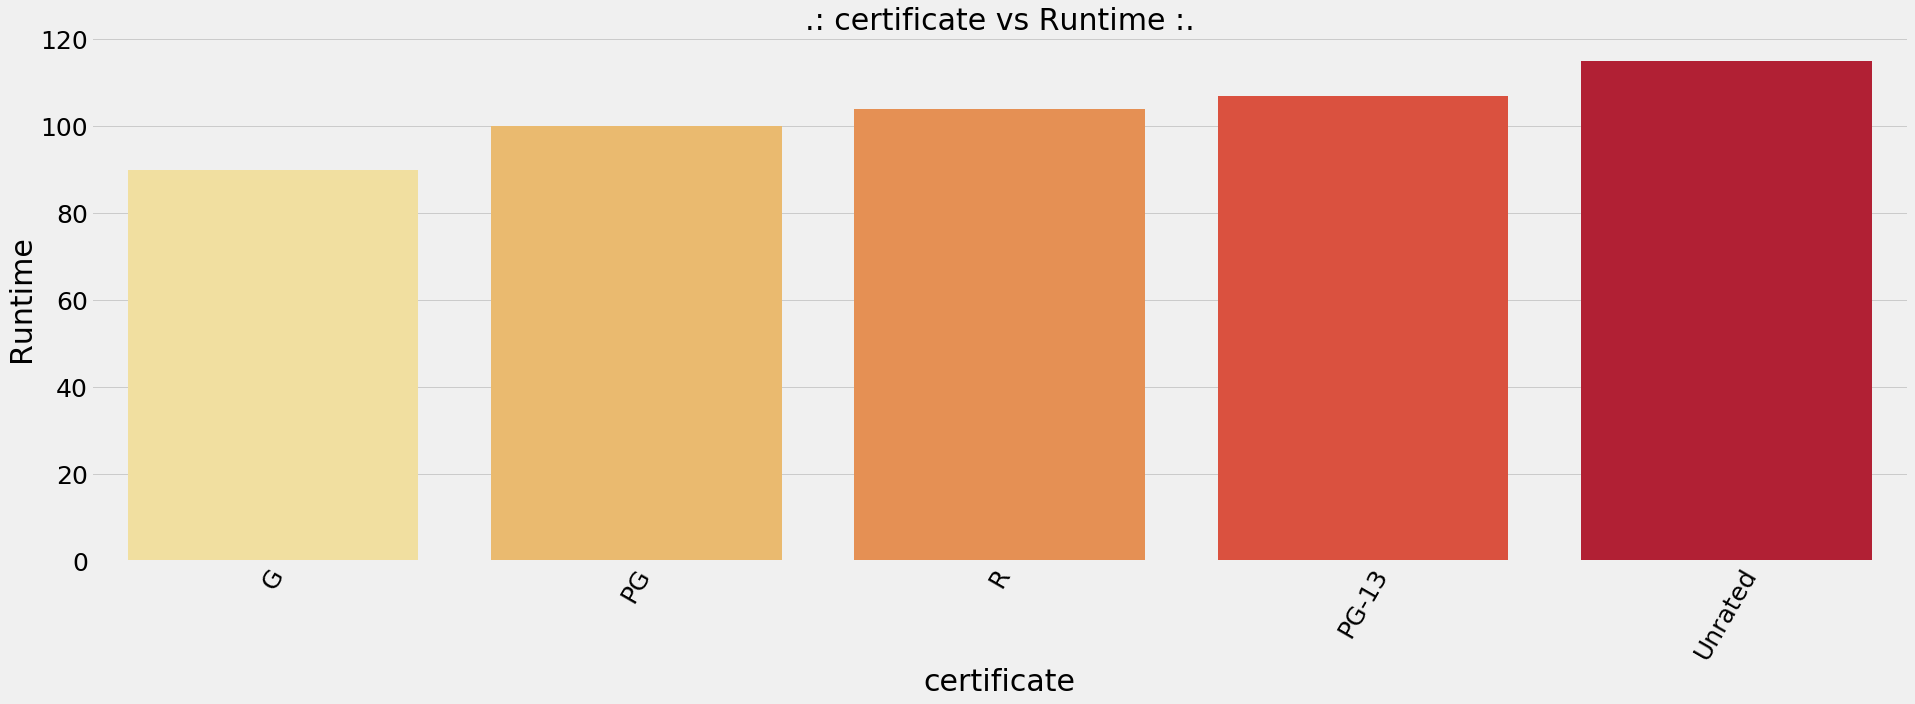

In [42]:
#Plot the runtime for each certificate
f, ax = plt.subplots(figsize=(29, 9))
sns.barplot(x = 'title', y = 'runtime', data=certeficate_describtion.sort_values(by=['runtime']),palette='YlOrRd')
ax.set_title('.: certificate vs Runtime :.',size=30)
ax.set_xlabel('certificate',size=30)
ax.set_ylabel('Runtime',size=30)
plt.xticks(size=25)
plt.yticks(size=25)
plt.xticks(rotation=60) 
plt.show()

In [43]:
#Set the title of certificate as index for better visulization
certeficate_describtion.set_index(['title'],inplace=True)
certeficate_describtion.head()

budget_avg  Gross_avg  cumilative_avg  fimdb_rating  runtime  votes  \
title                                                                          
G          52699333  120997168       148847133             6       90  83517   
PG         53338167   89344573       140867662             6      100  64449   
PG-13      48485769   82926245       106904131             6      107  99748   
R          23201254   87959449        25072449             6      104  49698   
Unrated    24847628  140634108         6793524             6      115  13536   

          won_per  nominated  
title                         
G        5.063291  29.113924  
PG       3.690037  22.693727  
PG-13    3.304774  31.884945  
R        2.345107  20.382166  
Unrated  0.000000   1.220753

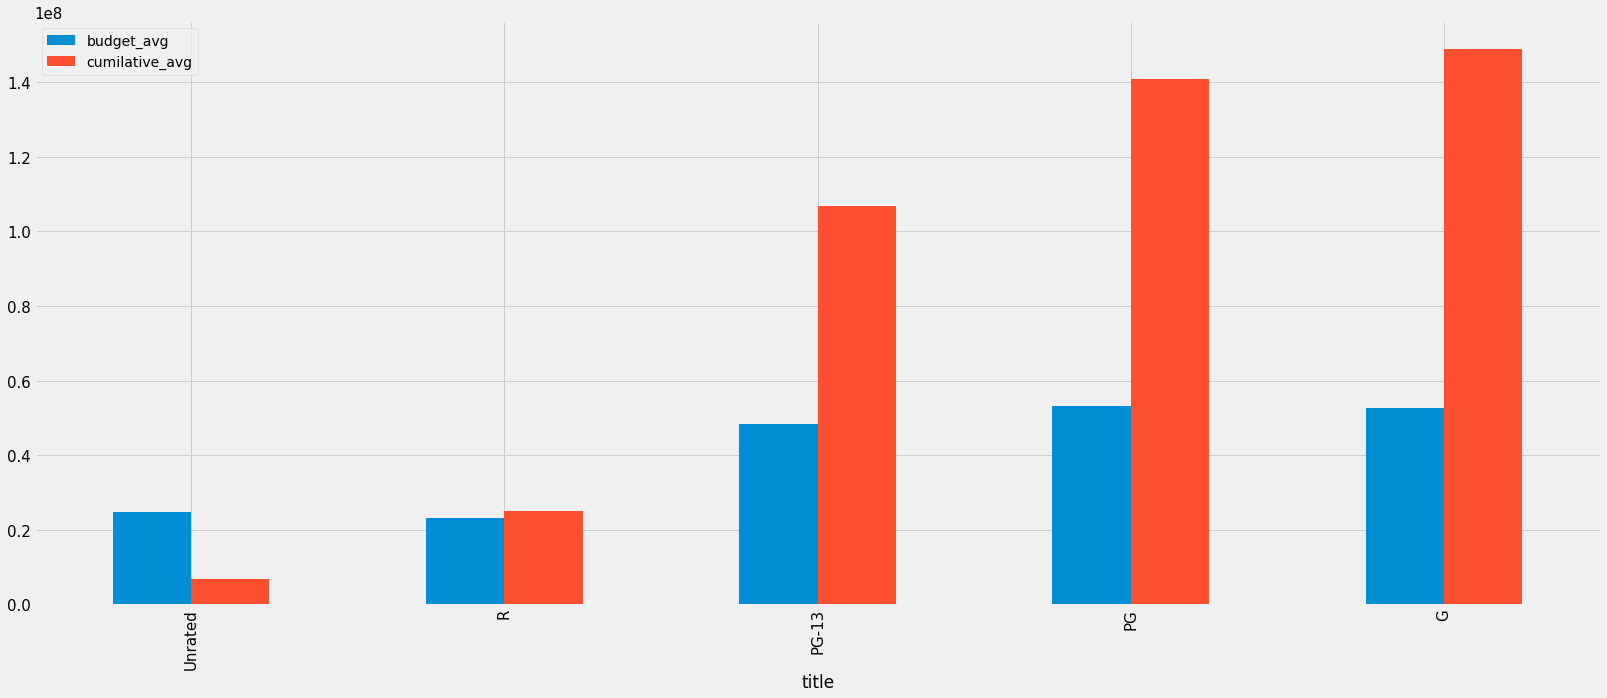

In [44]:
#Plot the budget and cumitave for each certificate
certeficate_describtion[['budget_avg','cumilative_avg']].sort_values(by=['cumilative_avg']).plot(kind='bar',figsize=(25,10))
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)


## Month

In [45]:
# Map the month to the name of month for better visulization
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'} 

df['month'] = df['month'].map(month_map)

In [46]:
df['month'].value_counts()


Oct    723
Sep    687
Apr    614
Aug    589
Nov    576
Mar    559
Jan    555
Dec    505
Jun    490
May    487
Feb    469
Jul    438
Name: month, dtype: int64

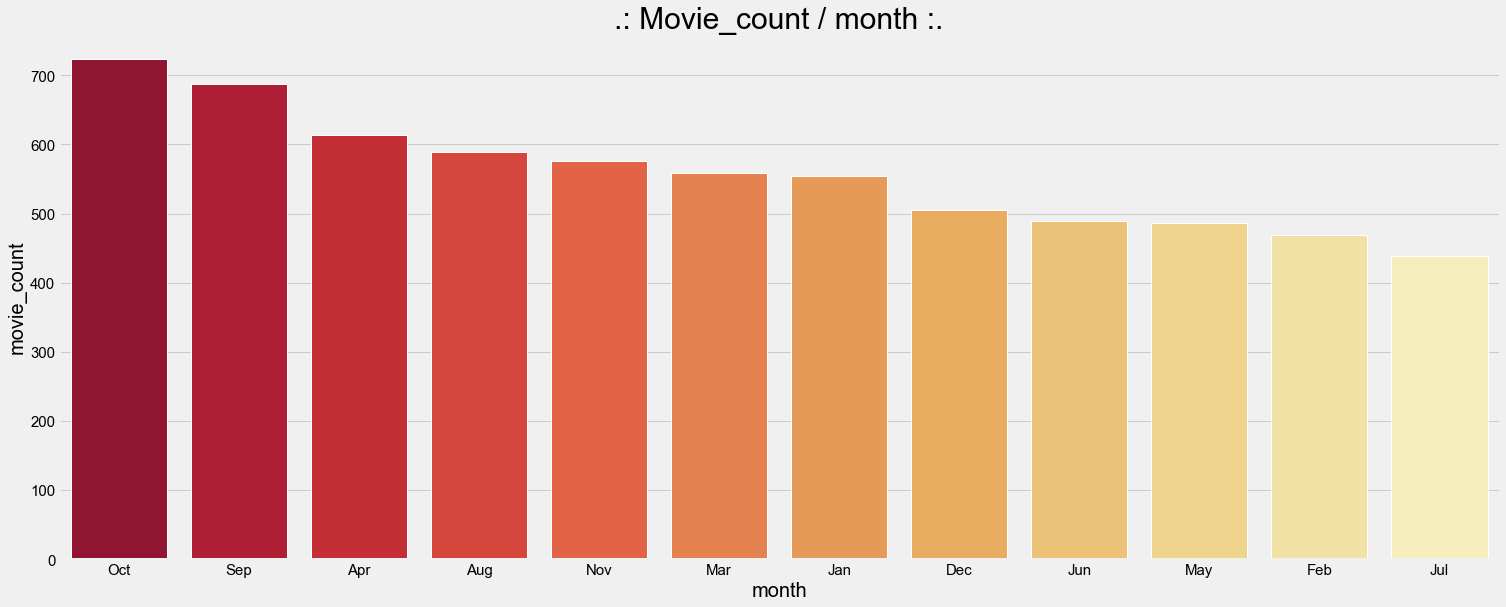

In [47]:
#Plot the movie count for each month
f, ax = plt.subplots(figsize=(23, 9))
sns.set(style="darkgrid")
ax = sns.countplot(x="month",order = df['month'].value_counts().index, data=df,palette='YlOrRd_r')
ax.set_title('.: Movie_count / month :.',size=30)
ax.set_xlabel('month',size=20)
ax.set_ylabel('movie_count',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [48]:
#Group the months to get better insight from each month
grouped_months = df.groupby('month') 

In [49]:
#Get the mean of gross for each month
grouped_months['fGross_y'].mean()

month
Apr    8.838465e+07
Aug    8.136582e+07
Dec    1.153027e+08
Feb    1.060084e+08
Jan    8.292620e+07
Jul    9.764521e+07
Jun    1.045056e+08
Mar    9.446883e+07
May    9.258502e+07
Nov    1.085646e+08
Oct    8.766478e+07
Sep    8.965010e+07
Name: fGross_y, dtype: float64

In [50]:
#Get the mean of budget for each month
grouped_months['fbudget_y'].mean()

month
Apr    2.547161e+07
Aug    3.035140e+07
Dec    3.754228e+07
Feb    3.238147e+07
Jan    2.614959e+07
Jul    3.969324e+07
Jun    4.020000e+07
Mar    3.472375e+07
May    4.131780e+07
Nov    3.679342e+07
Oct    2.751281e+07
Sep    2.472279e+07
Name: fbudget_y, dtype: float64

In [51]:
#Get the mean of cumlative for each month
grouped_months['fcumlative_y'].mean()

month
Apr    2.745062e+07
Aug    3.802080e+07
Dec    8.647448e+07
Feb    4.305054e+07
Jan    3.693515e+07
Jul    9.278852e+07
Jun    8.119617e+07
Mar    5.233854e+07
May    7.981656e+07
Nov    7.517867e+07
Oct    3.118462e+07
Sep    2.628207e+07
Name: fcumlative_y, dtype: float64

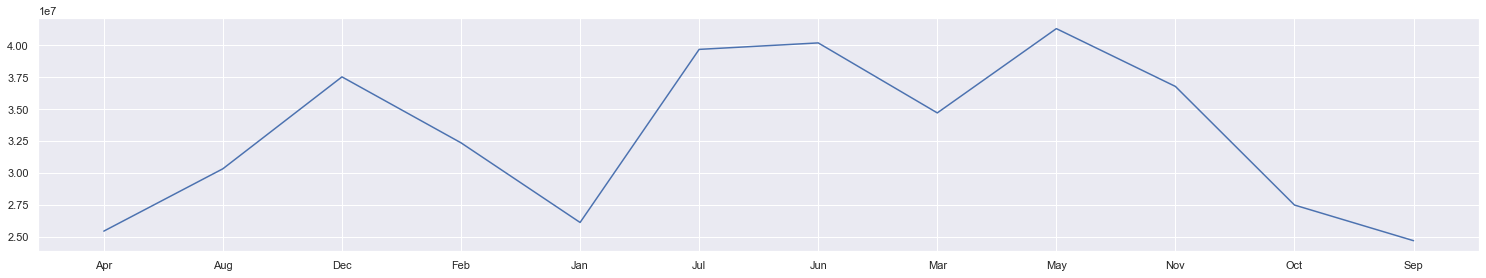

In [52]:
#Plot the budget for each month
f, ax = plt.subplots(figsize=(23, 4))
plt.plot(grouped_months[['fbudget_y']].mean(), label="Budget")

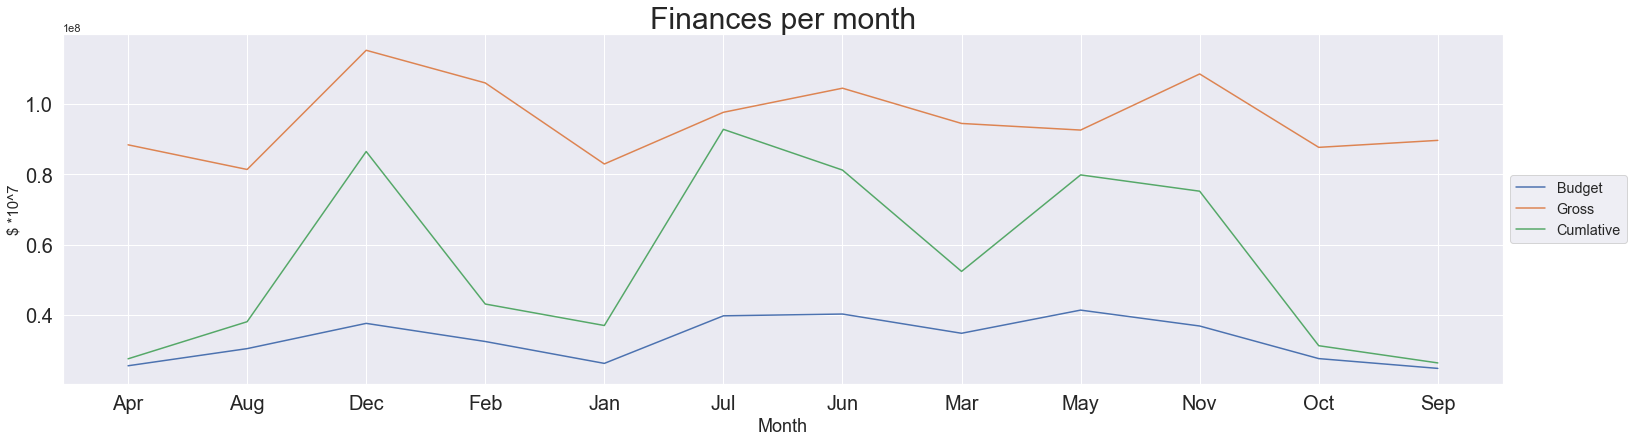

In [53]:
#Plot the finances for each month
f, ax = plt.subplots(figsize=(23, 6))
plt.plot(grouped_months['fbudget_y'].mean(), label="Budget")
plt.plot(grouped_months['fGross_y'].mean(), label="Gross")
plt.plot(grouped_months['fcumlative_y'].mean(), label="Cumlative")


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize='large')


plt.title("Finances per month", fontsize=30)
plt.xlabel("Month",size=18)
plt.ylabel("$ *10^7",size=15)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

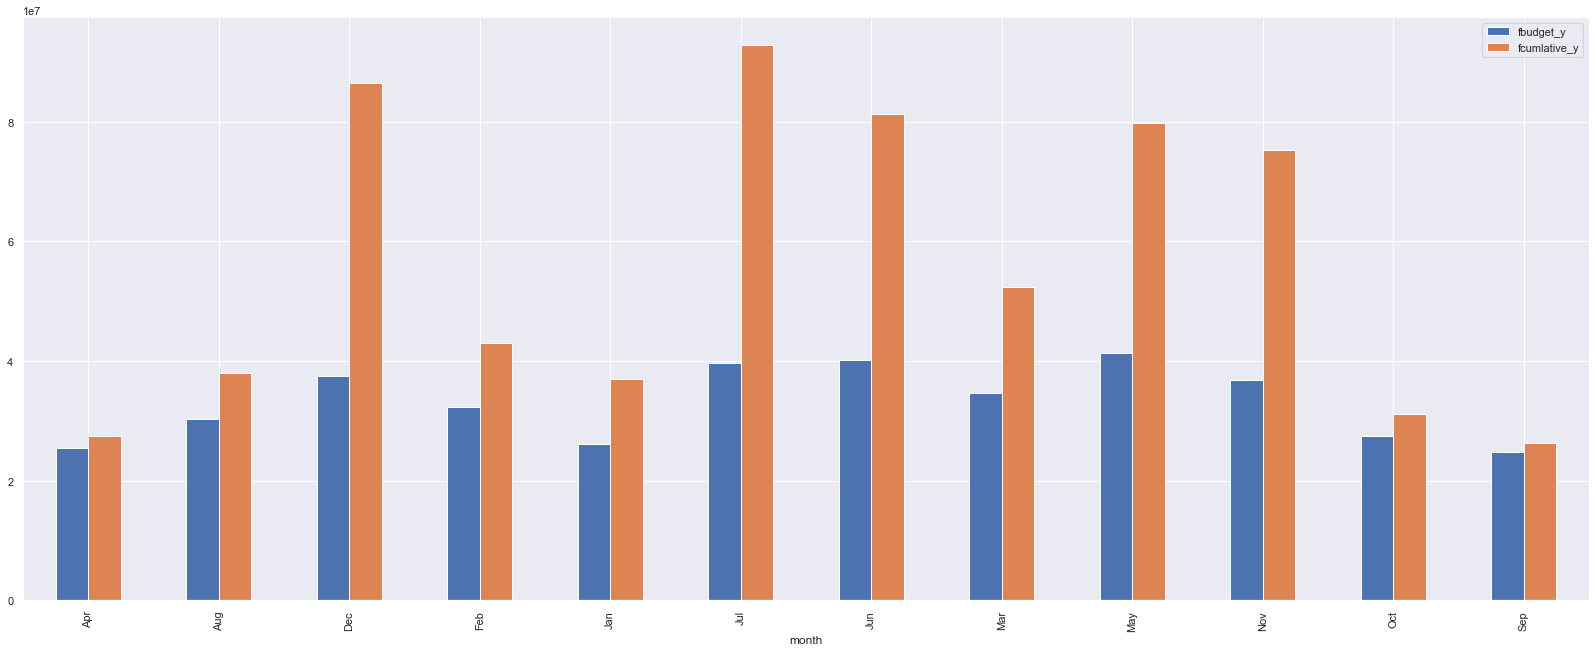

In [54]:
#Plot the budget and cumlative for each month
grouped_months[['fbudget_y','fcumlative_y']].mean().plot(kind='bar',figsize=(25,10))

In [55]:
df.columns

Index(['fid', 'fname', 'fruntime', 'fimdb_rating', 'fimdb_votes', 'fimd',
       'fdirector', 'fwriter', 'fassistant_directors', 'fcinematographers',
       'fcomposers', 'feditors', 'fproducer', 'fenglish', 'fmulti_lang', 'fus',
       'fmulti_country', 'fmystery', 'fadventure', 'ffamily', 'fromance',
       'fthriller', 'fwestern', 'fhistory', 'fmusical', 'fdrama', 'fwar',
       'ffantasy', 'fcrime', 'fanimation', 'fsport', 'faction', 'fbiography',
       'fcomedy', 'fsci_fi', 'fhorror', 'fmusic', 'actW', 'nominated', 'Won',
       'month', 'year', 'certificate_G', 'certificate_PG', 'certificate_PG-13',
       'certificate_R', 'certificate_Unrated', 'fproduction_BBC Films',
       'fproduction_Columbia Pictures', 'fproduction_Dimension Films',
       'fproduction_DreamWorks', 'fproduction_Fox Searchlight Pictures',
       'fproduction_Lionsgate', 'fproduction_Millennium Films',
       'fproduction_New Line Cinema', 'fproduction_Paramount Pictures',
       'fproduction_Screen Gems', 

In [56]:
grouped_months['fimdb_rating'].mean()

month
Apr    6.080293
Aug    6.199491
Dec    6.275446
Feb    6.090832
Jan    6.167568
Jul    6.151826
Jun    6.203469
Mar    6.290877
May    6.227926
Nov    6.421701
Oct    6.270816
Sep    6.238137
Name: fimdb_rating, dtype: float64

In [57]:
#Make a list and append the average month ,votes and rating for each month then make it a dataframe
monthss = []
for i in grouped_months['fimdb_votes'].mean().index:
    monthss.append(i)
    
votess = []
for i in grouped_months['fimdb_votes'].mean().values:
    votess.append(i)
    
rating = []
for i in grouped_months['fimdb_rating'].mean().values:
    rating.append(i)

a = pd.DataFrame({'month':monthss,'votes':votess,'rating':rating})
a

month         votes    rating
0    Apr  36050.097720  6.080293
1    Aug  48918.319185  6.199491
2    Dec  85972.433663  6.275446
3    Feb  51430.603412  6.090832
4    Jan  56294.994595  6.167568
5    Jul  83939.401826  6.151826
6    Jun  71347.414286  6.203469
7    Mar  54544.475850  6.290877
8    May  68350.792608  6.227926
9    Nov  71625.633681  6.421701
10   Oct  51184.066390  6.270816
11   Sep  37829.550218  6.238137

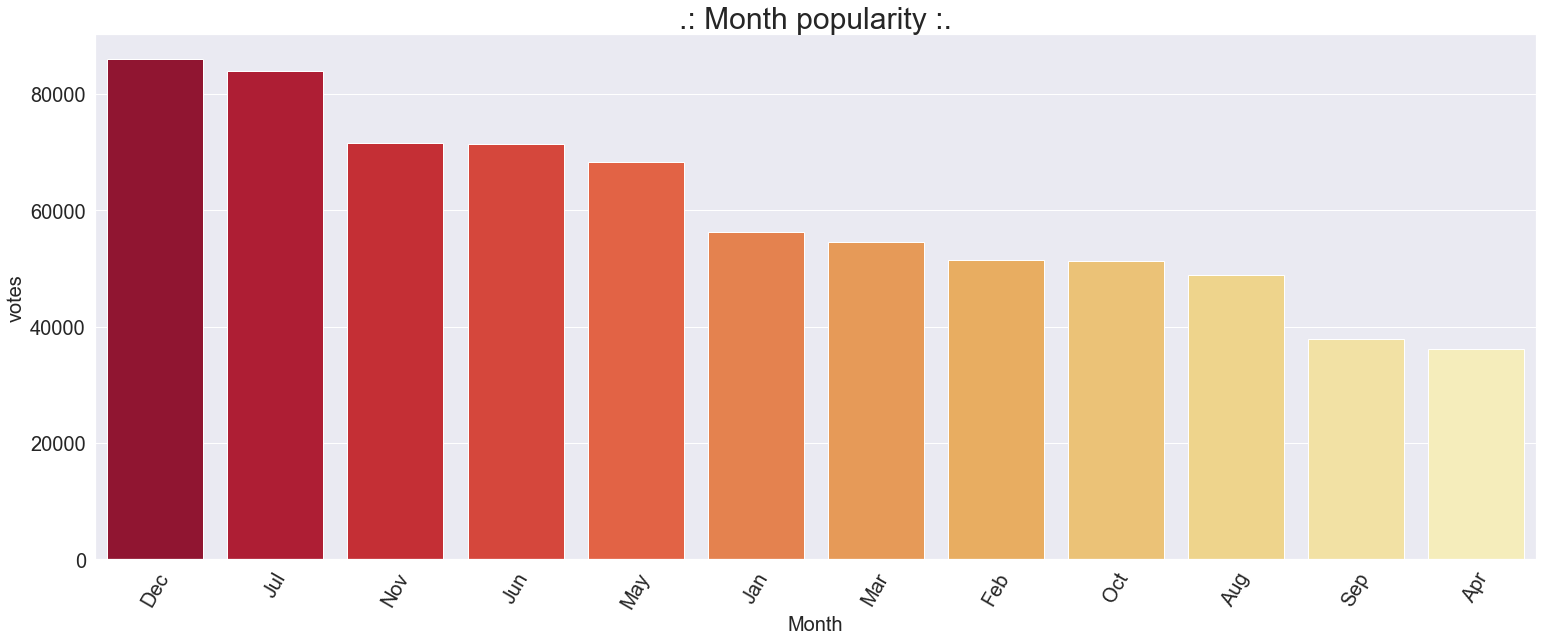

In [58]:
#Plot the popularity of each month
f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'month', y = 'votes', data=a.sort_values(by=['votes'],ascending=False),palette='YlOrRd_r')
ax.set_title('.: Month popularity :.',size=30)
ax.set_xlabel('Month',size=20)
plt.xticks(rotation=60)                                                               
ax.set_ylabel('votes',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

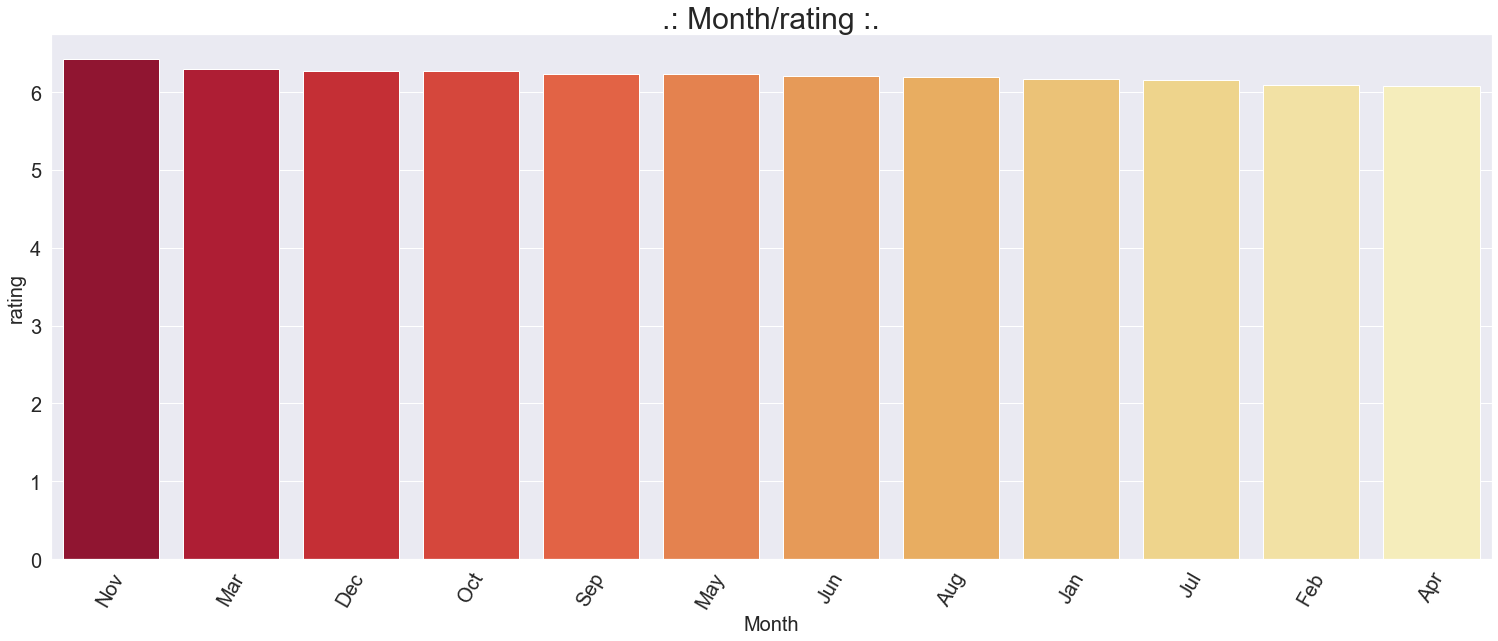

In [59]:
#Plot the movie rating of each month
f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'month', y = 'rating', data=a.sort_values(by=['rating'],ascending=False),palette='YlOrRd_r')
ax.set_title('.: Month/rating :.',size=30)
ax.set_xlabel('Month',size=20)
plt.xticks(rotation=60)                                                               
ax.set_ylabel('rating',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### find the relationship between being nominated and winning the oscar

In [60]:
#Get the reqired columns
N_W = df[['Won','nominated']]
#Get the product of won * nomiated to specify if the movie has been nominated or no since the product of 0 is 0
N_W['wXn'] = N_W['Won'] * N_W['nominated']
N_W['wXn'].head(50)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11    13.0
12     0.0
13     0.0
14     0.0
15     0.0
16     2.0
17     0.0
18     0.0
19     0.0
20     0.0
21     2.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
34     0.0
35     7.0
36     0.0
37     0.0
38     0.0
39     0.0
40     0.0
41     0.0
42     0.0
43     0.0
44     1.0
45     0.0
46     0.0
47     0.0
48     0.0
49     0.0
Name: wXn, dtype: float64

In [61]:
df.columns

Index(['fid', 'fname', 'fruntime', 'fimdb_rating', 'fimdb_votes', 'fimd',
       'fdirector', 'fwriter', 'fassistant_directors', 'fcinematographers',
       'fcomposers', 'feditors', 'fproducer', 'fenglish', 'fmulti_lang', 'fus',
       'fmulti_country', 'fmystery', 'fadventure', 'ffamily', 'fromance',
       'fthriller', 'fwestern', 'fhistory', 'fmusical', 'fdrama', 'fwar',
       'ffantasy', 'fcrime', 'fanimation', 'fsport', 'faction', 'fbiography',
       'fcomedy', 'fsci_fi', 'fhorror', 'fmusic', 'actW', 'nominated', 'Won',
       'month', 'year', 'certificate_G', 'certificate_PG', 'certificate_PG-13',
       'certificate_R', 'certificate_Unrated', 'fproduction_BBC Films',
       'fproduction_Columbia Pictures', 'fproduction_Dimension Films',
       'fproduction_DreamWorks', 'fproduction_Fox Searchlight Pictures',
       'fproduction_Lionsgate', 'fproduction_Millennium Films',
       'fproduction_New Line Cinema', 'fproduction_Paramount Pictures',
       'fproduction_Screen Gems', 

In [62]:
#Make a list with the reqired boolean columns
gen_dfcol = ['fbiography',  'fdrama', 'fcomedy',
       'fcrime', 'fadventure',  'ffantasy', 'fthriller',
       'fmystery', 'fromance', 'fwestern', 'fmusic',
       'fanimation', 'fsci_fi', 'ffamily',  'fmusical',
       'fsport', 'fhistory', 'fhorror', 'fwar', 'faction', 'nominated','Won']
gen_df = df[gen_dfcol]

In [63]:
won_gen_df = gen_df

In [64]:
#Make a dictinary of lists to append the product of each genre 
wdict = {'fbiography':[],  'fdrama':[], 'fcomedy':[],
       'fcrime':[], 'fadventure':[],  'ffantasy':[], 'fthriller':[],
       'fmystery':[], 'fromance':[], 'fwestern':[], 'fmusic':[],
       'fanimation':[],  'fsci_fi':[], 'ffamily':[],  'fmusical':[],
       'fsport':[], 'fhistory':[], 'fhorror':[], 'fwar':[], 'faction':[], 'Won':won_gen_df['Won']}
for index, row in won_gen_df.iterrows():
    for c in ['fbiography',  'fdrama', 'fcomedy',
       'fcrime', 'fadventure', 'ffantasy', 'fthriller',
       'fmystery', 'fromance', 'fwestern', 'fmusic', 
       'fanimation', 'fsci_fi', 'ffamily', 'fmusical',
       'fsport', 'fhistory', 'fhorror', 'fwar', 'faction']:
        wdict[c].append(row["Won"] if row[c]  ==1 else 0)
        print(c,'done')


fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffa

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffa

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done


fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrim

fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrim

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi d

fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fd

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fd

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done


faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi d

fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbi

fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbi

fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror d

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fd

fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror d

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmy

fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadvent

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadvent

fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthri

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory do

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadvent

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthri

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fd

fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthri

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbi

fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrim

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done

fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthri

faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi d

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrim

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbi

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrim

fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done


fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory do

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthri

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbi

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmy

fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffa

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi d

faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi d

fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthri

ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmy

fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadvent

fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done

fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrim

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi d

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbi

fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done


ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror d

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror d

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory do

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done

fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory do

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory do

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadvent

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffa

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror d

fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadvent

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadvent

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthri

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fd

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fd

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadvent

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthri

ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmy

fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror d

ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmy

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory do

ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmy

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done

fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthri

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffa

faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi d

In [65]:
#Make it a dataframe
df_won = pd.DataFrame.from_dict(wdict)

In [66]:
#Get the sum of winnings per genre
gen_won_sum = df_won.sum()

In [67]:
gen_sum = won_gen_df.sum()

In [68]:
#Change the name
WON = pd.DataFrame()

In [69]:
#Add the lists to the DF
WON ['gen_won_sum'] = gen_won_sum
WON ['gen_sum'] = gen_sum

In [70]:
#Iterate over the columns and get the average
w_avrg = []
for index, row in WON.iterrows():
    
    w_avrg.append(row ['gen_won_sum'] / row ['gen_sum'] )
WON['WonAVG'] = w_avrg

In [71]:
#Make the genre name the index
WON['Genre'] = WON.index
WON.sort_values(by='gen_sum')

gen_won_sum  gen_sum    WonAVG       Genre
fwestern            4.0     75.0  0.053333    fwestern
fmusical            7.0    155.0  0.045161    fmusical
Won               159.0    159.0  1.000000         Won
fsport              2.0    196.0  0.010204      fsport
fmusic             11.0    249.0  0.044177      fmusic
fanimation         17.0    260.0  0.065385  fanimation
fwar               18.0    280.0  0.064286        fwar
fhistory           21.0    285.0  0.073684    fhistory
fbiography         36.0    457.0  0.078775  fbiography
ffamily            25.0    498.0  0.050201     ffamily
fsci_fi            12.0    563.0  0.021314     fsci_fi
ffantasy           29.0    631.0  0.045959    ffantasy
fmystery           21.0    755.0  0.027815    fmystery
fadventure         42.0    815.0  0.051534  fadventure
fhorror             3.0    886.0  0.003386     fhorror
fcrime             17.0   1154.0  0.014731      fcrime
faction            20.0   1326.0  0.015083     faction
fromance           38.0   1666.0  0.022809    fromance
fthriller          39.0   2025.0  0.019259   fthriller
fcomedy            32.0   2496.0  0.012821     fcomedy
fdrama            125.0   4132.0  0.030252      fdrama

In [72]:
#choose columns for new dataframe
w = pd.DataFrame()
w = WON[['gen_won_sum','Genre']]
w.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, fbiography to Won
Data columns (total 2 columns):
gen_won_sum    21 non-null float64
Genre          21 non-null object
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes


In [73]:
# mask movies that did'nt win
new_w = w[w['Genre'] != 'Won']

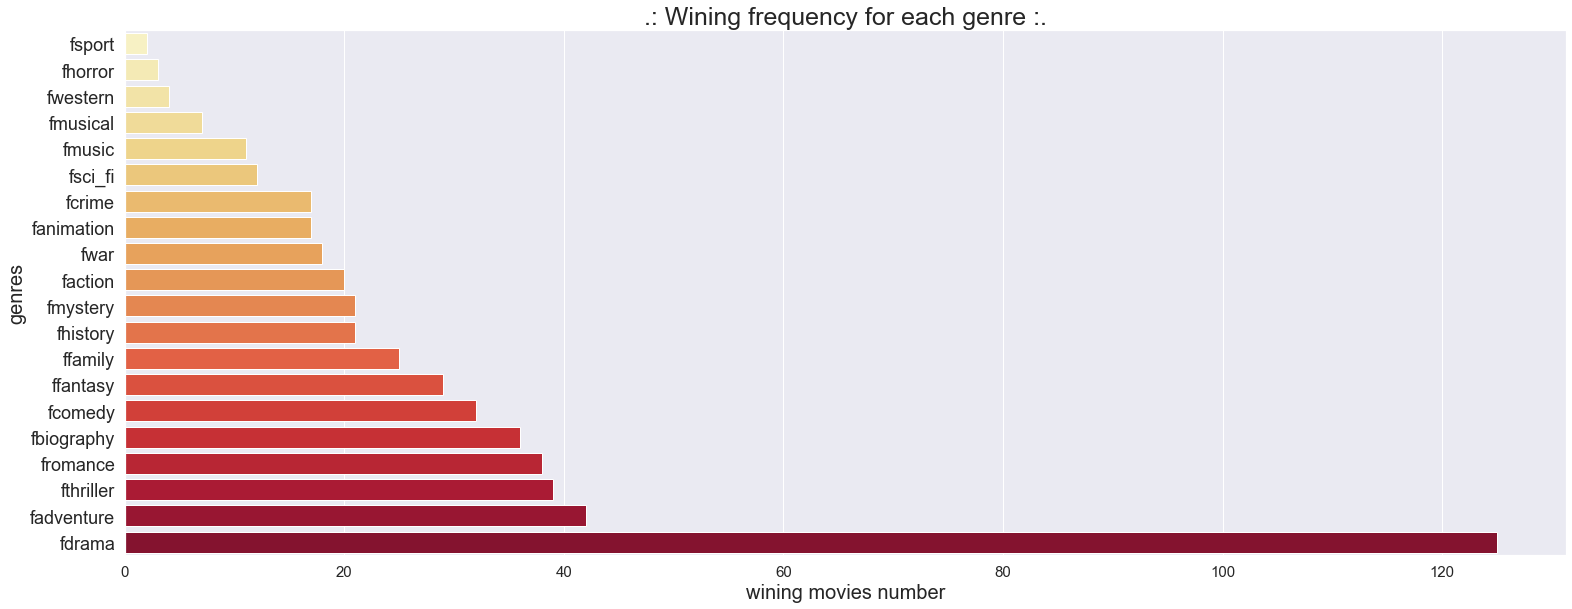

In [74]:
#Plot the genres that and the winning frequency 
#(this is not accurate due to the large number of certin column which was solved above by taking that into considration)
f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'gen_won_sum', y = 'Genre', data=new_w.sort_values(by='gen_won_sum'),palette='YlOrRd')
ax.set_title('.: Wining frequency for each genre :.',size=25)
ax.set_xlabel('wining movies number',size=20)
ax.set_ylabel('genres',size=20)
plt.xticks(size=15)
plt.yticks(size=18)
plt.show()

#### Nominated

In [75]:
nom_gen_df = gen_df

In [76]:
nom_gen_df.columns

Index(['fbiography', 'fdrama', 'fcomedy', 'fcrime', 'fadventure', 'ffantasy',
       'fthriller', 'fmystery', 'fromance', 'fwestern', 'fmusic', 'fanimation',
       'fsci_fi', 'ffamily', 'fmusical', 'fsport', 'fhistory', 'fhorror',
       'fwar', 'faction', 'nominated', 'Won'],
      dtype='object')

In [77]:
#Make a list with the reqired boolean columns
#Make a dictinary of lists to append the product of each genre 
ndict = {'fbiography':[],  'fdrama':[], 'fcomedy':[],
       'fcrime':[], 'fadventure':[],  'ffantasy':[], 'fthriller':[],
       'fmystery':[], 'fromance':[], 'fwestern':[], 'fmusic':[],
       'fanimation':[],  'fsci_fi':[], 'ffamily':[],  'fmusical':[],
       'fsport':[], 'fhistory':[], 'fhorror':[], 'fwar':[], 'faction':[], 'Won':won_gen_df['Won']}
for index, row in nom_gen_df.iterrows():
    for c in ['fbiography',  'fdrama', 'fcomedy',
       'fcrime', 'fadventure', 'ffantasy', 'fthriller',
       'fmystery', 'fromance', 'fwestern', 'fmusic', 
       'fanimation', 'fsci_fi', 'ffamily', 'fmusical',
       'fsport', 'fhistory', 'fhorror', 'fwar', 'faction']:

        ndict[c].append(row["nominated"] if row[c]  ==1 else 0)
        print(c,'done')

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadvent

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrim

fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrim

fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrim

faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi d

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done

fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fd

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fd

fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done


fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbi

fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrim

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror d

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmy

ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmy

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthri

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi d

fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffa

fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadvent

fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory do

fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffa

fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrim

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fd

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fd

fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadvent

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbi

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffa

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrim

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmy

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthri

faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi d

fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbi

faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi d

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadvent

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthri

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done


fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done


fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror d

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrim

fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory do

faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi d

fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrim

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fr

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done


ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror d

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror d

ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmy

fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory do

ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmy

fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory do

fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthri

fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport don

fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthri

fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthri

fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadvent

fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffa

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffa

fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrim

fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory do

fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbi

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrim

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fw

fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done

fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fd

fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fa

fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fd

fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffa

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done


fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done


ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done


fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbi

fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror d

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi d

fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbi

fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror d

ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmy

fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror d

fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily d

ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
fa

fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadvent

fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffa

fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthri

fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi d

fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffa

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical don

fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcomedy done
fcrime done
fadventure done
ffantasy done
fthriller done
fmystery done
fromance done
fwestern done
fmusic done
fanimation done
fsci_fi done
ffamily done
fmusical done
fsport done
fhistory done
fhorror done
fwar done
faction done
fbiography done
fdrama done
fcom

In [78]:
#make it a dataframe
df_nom = pd.DataFrame.from_dict(ndict)

In [79]:
#Get the sum of nominations per genre
gen_nom_sum = df_nom.sum()

In [80]:
#Get the sum of nominations per genre
gen_sum_n = nom_gen_df.sum()

In [81]:
#Make a dataframe
NOM = pd.DataFrame()

In [82]:
#Add the lists to the DF
NOM ['gen_nom_sum'] = gen_nom_sum
NOM ['gen_sum'] = gen_sum_n

#Iterate over the columns and get the average
n_avrg = []
for index, row in NOM.iterrows():

    n_avrg.append(row ['gen_nom_sum'] / row ['gen_sum'] )
NOM['NomAVG'] = n_avrg

NOM['Genre'] = NOM.index
NOM.head()

n = pd.DataFrame()
n = NOM[['gen_nom_sum','Genre']]
n.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, fbiography to Won
Data columns (total 2 columns):
gen_nom_sum    21 non-null float64
Genre          21 non-null object
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes


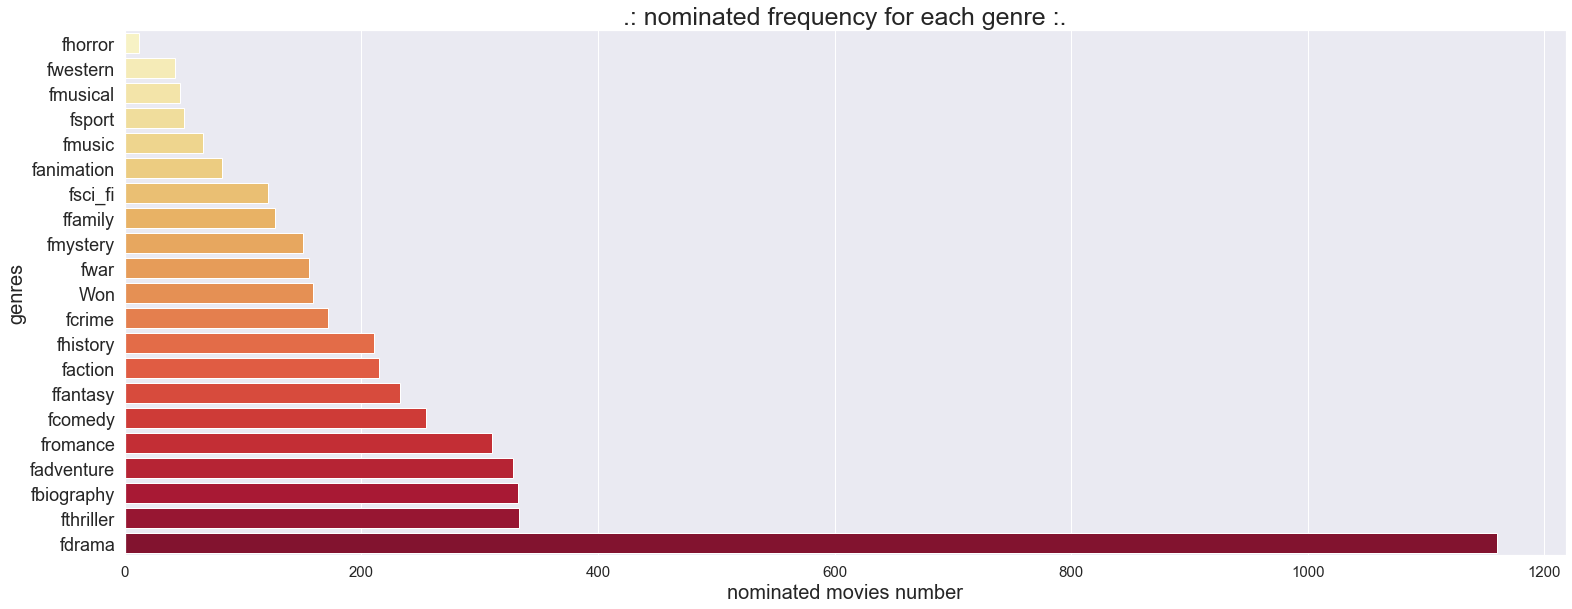

In [83]:
#Plot the nominated frequency 
f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'gen_nom_sum', y = 'Genre', data=n.sort_values(by='gen_nom_sum'),palette='YlOrRd')
ax.set_title('.: nominated frequency for each genre :.',size=25)
ax.set_xlabel('nominated movies number',size=20)
ax.set_ylabel('genres',size=20)
plt.xticks(size=15)
plt.yticks(size=18)
plt.show()



### votes/runtime

In [84]:
temp_x = df[df['fruntime'] < 250]

In [85]:
temp_x['fimdb_votes'].mean()

58221.91581937799

In [86]:
temp_x.columns

Index(['fid', 'fname', 'fruntime', 'fimdb_rating', 'fimdb_votes', 'fimd',
       'fdirector', 'fwriter', 'fassistant_directors', 'fcinematographers',
       'fcomposers', 'feditors', 'fproducer', 'fenglish', 'fmulti_lang', 'fus',
       'fmulti_country', 'fmystery', 'fadventure', 'ffamily', 'fromance',
       'fthriller', 'fwestern', 'fhistory', 'fmusical', 'fdrama', 'fwar',
       'ffantasy', 'fcrime', 'fanimation', 'fsport', 'faction', 'fbiography',
       'fcomedy', 'fsci_fi', 'fhorror', 'fmusic', 'actW', 'nominated', 'Won',
       'month', 'year', 'certificate_G', 'certificate_PG', 'certificate_PG-13',
       'certificate_R', 'certificate_Unrated', 'fproduction_BBC Films',
       'fproduction_Columbia Pictures', 'fproduction_Dimension Films',
       'fproduction_DreamWorks', 'fproduction_Fox Searchlight Pictures',
       'fproduction_Lionsgate', 'fproduction_Millennium Films',
       'fproduction_New Line Cinema', 'fproduction_Paramount Pictures',
       'fproduction_Screen Gems', 

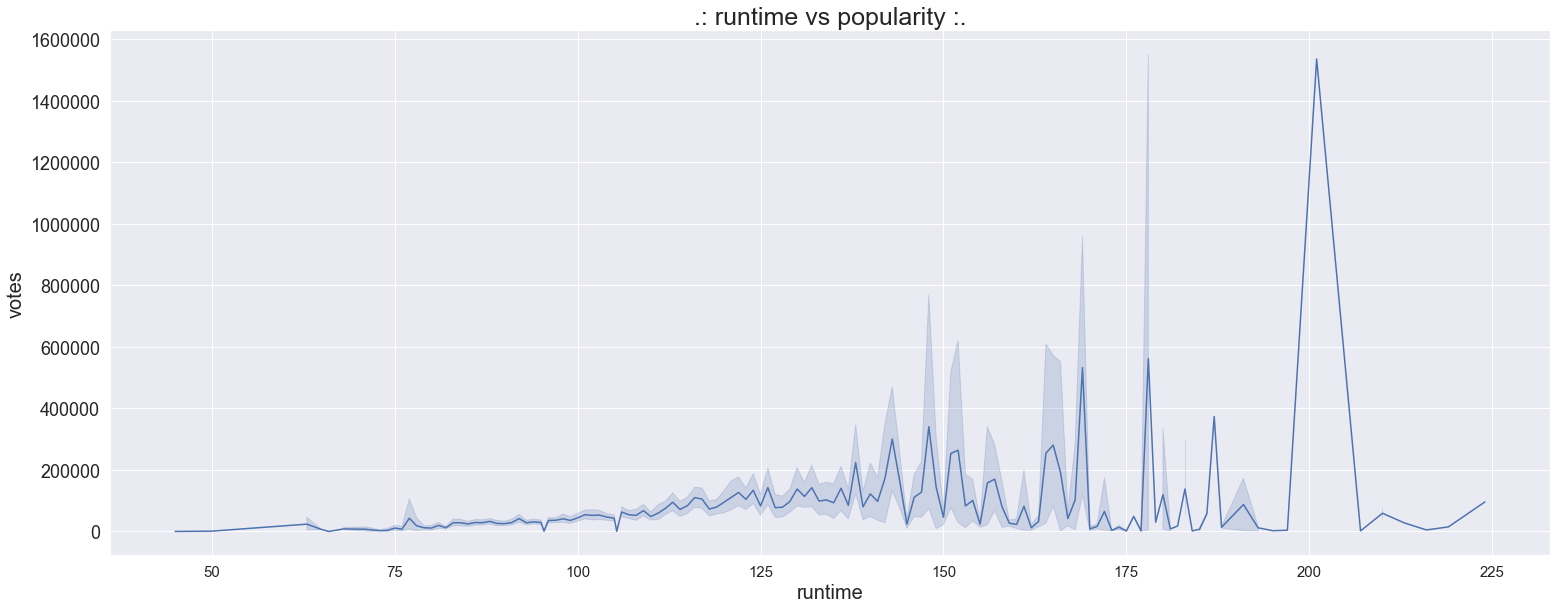

In [87]:
#Plot the runtime vs popularity
f, ax = plt.subplots(figsize=(23, 9))
sns.lineplot(x=temp_x['fruntime'],y=temp_x['fimdb_votes'])
ax.set_title('.: runtime vs popularity :.',size=25)
ax.set_xlabel('runtime',size=20)
ax.set_ylabel('votes',size=20)
plt.xticks(size=15)
plt.yticks(size=18)
plt.show()

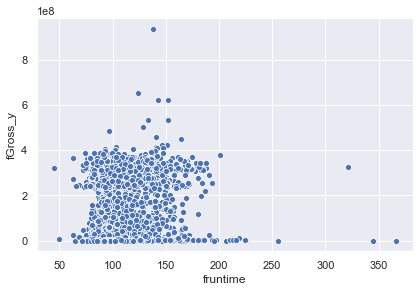

In [88]:
sns.scatterplot(x='fruntime',y='fGross_y',data=df)

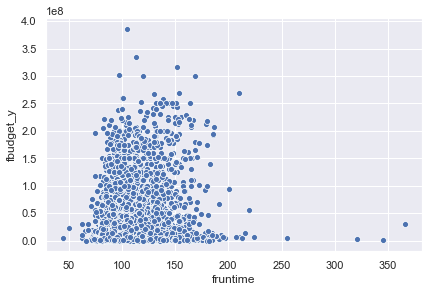

In [89]:
sns.scatterplot(x='fruntime',y='fbudget_y',data=df)